<a href="https://colab.research.google.com/github/prasditama/abeam-business-data-analyst/blob/main/README/ABEAM_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Data Analysis Workflow
This notebook includes all steps from data overview, cleaning, univariate & bivariate analysis.

# Importing and Confirmating Data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/Colab Notebooks/cp_data_eng_full_large_2.csv'
# === Import Required Libraries ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency
sns.set(style='whitegrid')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# === Load Dataset ===
df = pd.read_csv(path)

In [ ]:
# === 3-1: Data Confirmation ===
print(f'Number of Records: {df.shape[0]}')
print(f'Number of Columns: {df.shape[1]}')
print(f'Target Variable Present: {"Response" in df.columns}')

Number of Records: 71293
Number of Columns: 69
Target Variable Present: True


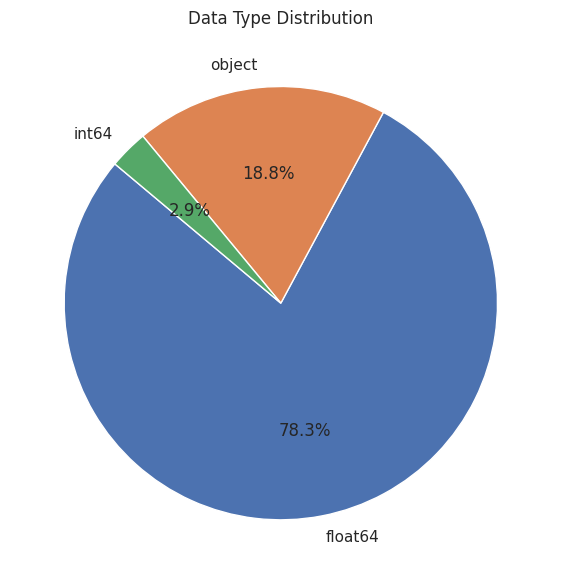

In [ ]:
# Data Type Distribution
plt.figure(figsize=(6,6))
df.dtypes.value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Data Type Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

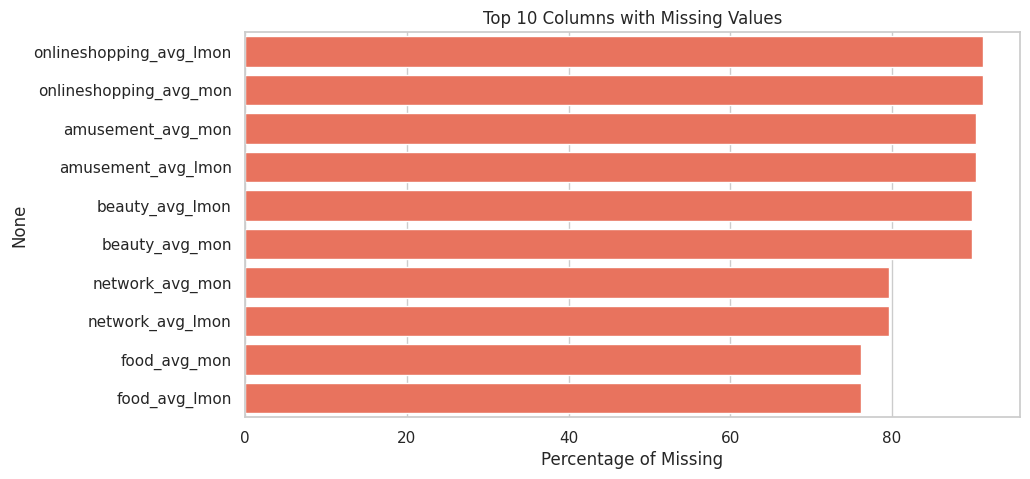

In [ ]:
# Top 10 Missing Value Columns
missing_ratio = df.isnull().mean().sort_values(ascending=False)
top_missing = missing_ratio[missing_ratio > 0].head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_missing.values*100, y=top_missing.index, color='tomato')
plt.xlabel('Percentage of Missing')
plt.title('Top 10 Columns with Missing Values')
plt.show()

***We decide to drop the missing values on our objective variables 'Response'***



In [ ]:
df_clean = df.dropna(subset=['Response'])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23043 entries, 0 to 23332
Data columns (total 69 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NO                       23043 non-null  int64  
 1   Customer_ID              23043 non-null  int64  
 2   Response                 23043 non-null  object 
 3   Sex                      23043 non-null  object 
 4   Age                      23043 non-null  float64
 5   Card_type                23043 non-null  object 
 6   Shopping                 23043 non-null  float64
 7   Cashing                  23043 non-null  float64
 8   ETC                      23043 non-null  float64
 9   Card_contraction         23043 non-null  object 
 10  Card_grade               23043 non-null  object 
 11  Job                      17138 non-null  object 
 12  On_the_job               23043 non-null  object 
 13  marriage                 21490 non-null  object 
 14  questionnaire1           23

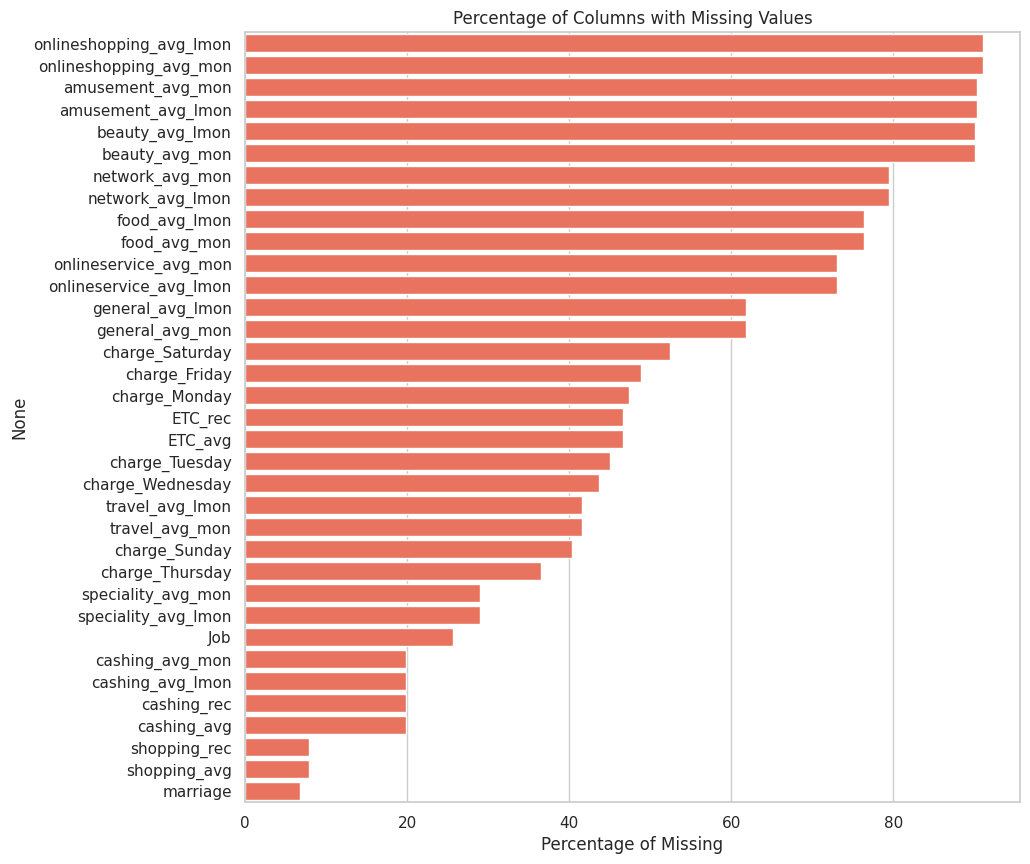

In [ ]:
# Percentage of Missing Value Columns after cleaning missing response
missing_ratio = df_clean.isnull().mean().sort_values(ascending=False)
top_missing = missing_ratio[missing_ratio > 0].head(69)
plt.figure(figsize=(10,10))
sns.barplot(x=top_missing.values*100, y=top_missing.index, color='tomato')
plt.xlabel('Percentage of Missing')
plt.title('Percentage of Columns with Missing Values')
plt.show()

In [ ]:
# Remove duplicates if exist
df_clean = df_clean.drop_duplicates()

# Reset index
df_clean.reset_index(drop=True, inplace=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23043 entries, 0 to 23042
Data columns (total 69 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NO                       23043 non-null  int64  
 1   Customer_ID              23043 non-null  int64  
 2   Response                 23043 non-null  object 
 3   Sex                      23043 non-null  object 
 4   Age                      23043 non-null  float64
 5   Card_type                23043 non-null  object 
 6   Shopping                 23043 non-null  float64
 7   Cashing                  23043 non-null  float64
 8   ETC                      23043 non-null  float64
 9   Card_contraction         23043 non-null  object 
 10  Card_grade               23043 non-null  object 
 11  Job                      17138 non-null  object 
 12  On_the_job               23043 non-null  object 
 13  marriage                 21490 non-null  object 
 14  questionnaire1        

***There is no duplicate customer at the big data***

# Univariate Analysis


We categorized the analysis by grouping variables into 6W2H framework at cause effect diagram.
*   Target variables (Response)
*   Who : Customer Attributes
    1. Age
    2. Sex
    3. Job and Working Status
    4. Marital status
    5. Card type and grade
    6. Card Contraction and Expiration
*   How : Satisfaction and Intention (questionnaire)
*   How much : Amount
*   Where : Place of Purchase
*   When : Timing
*   What : Frequency

Further analysis can be seen at Bivariate analysis







In [ ]:
# Describing Age Data
df_clean['Age'].describe()

,Age
count,23043.000000
mean,35.069392
std,12.915031
min,5.000000
25%,27.000000
50%,34.000000
75%,42.000000
max,204.000000


In [ ]:
# Drop the data with customer age above 100
df_clean = df_clean[df_clean['Age'] < 100]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22998 entries, 0 to 23042
Data columns (total 69 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NO                       22998 non-null  int64  
 1   Customer_ID              22998 non-null  int64  
 2   Response                 22998 non-null  object 
 3   Sex                      22998 non-null  object 
 4   Age                      22998 non-null  float64
 5   Card_type                22998 non-null  object 
 6   Shopping                 22998 non-null  float64
 7   Cashing                  22998 non-null  float64
 8   ETC                      22998 non-null  float64
 9   Card_contraction         22998 non-null  object 
 10  Card_grade               22998 non-null  object 
 11  Job                      17094 non-null  object 
 12  On_the_job               22998 non-null  object 
 13  marriage                 21484 non-null  object 
 14  questionnaire1           22

From the boxplot, we dropped the row that consist Age above 100 which is impossible and mostly rare.


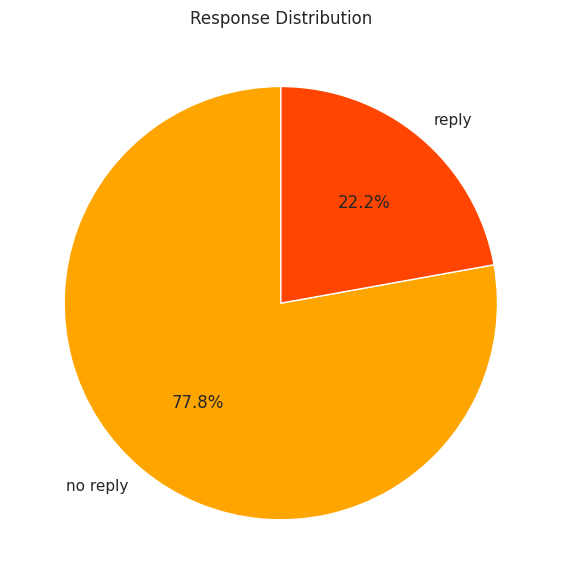

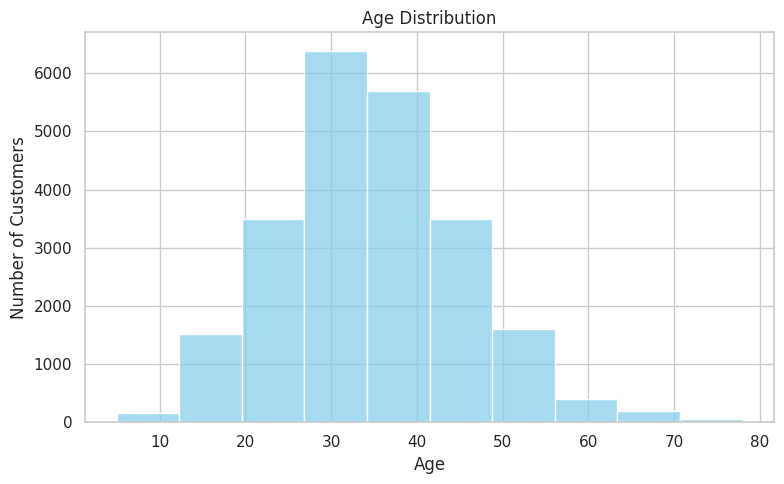

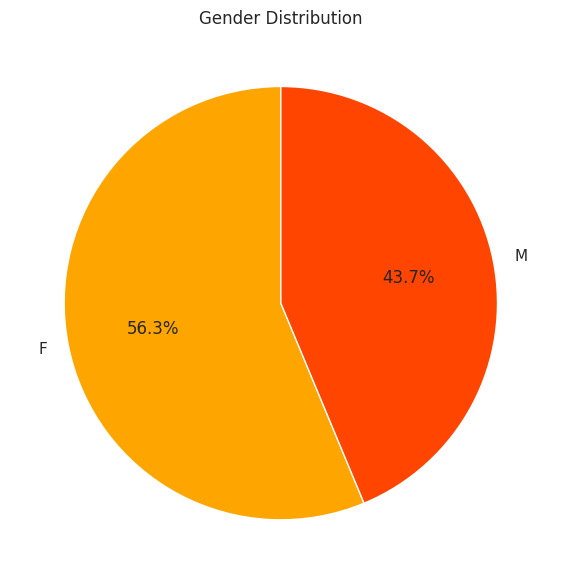

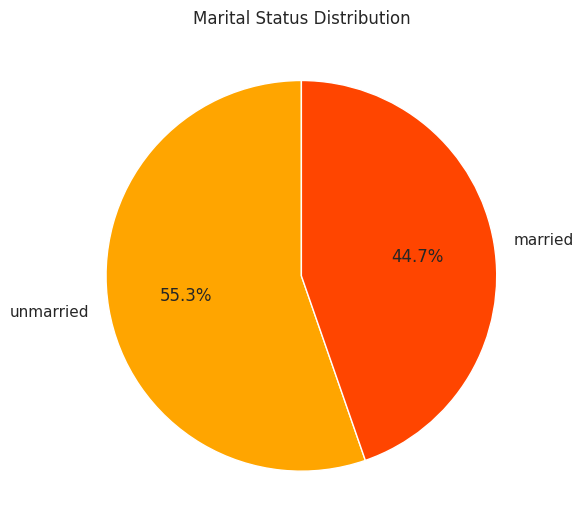

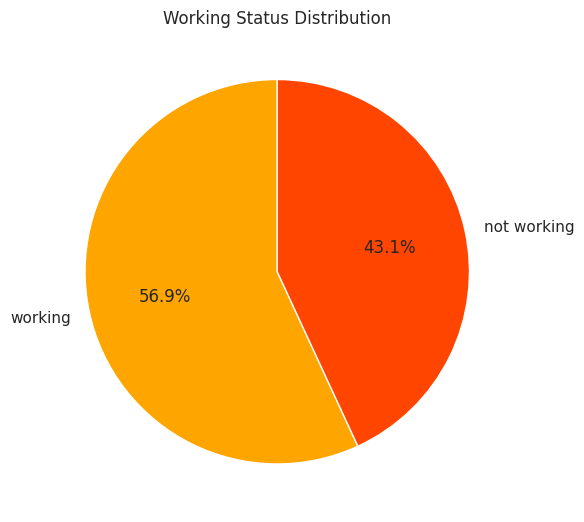

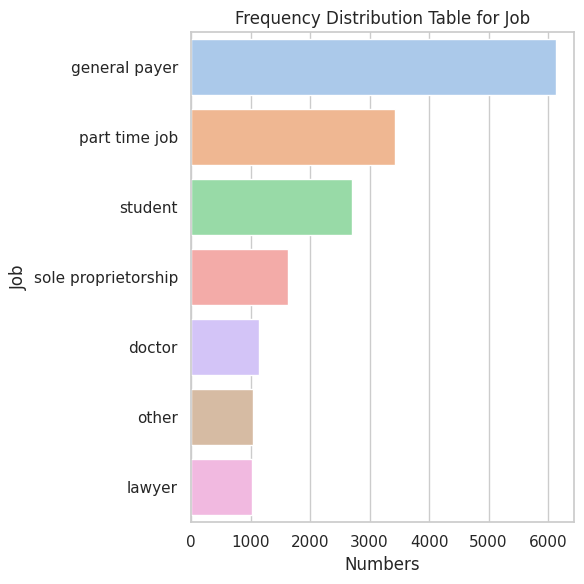

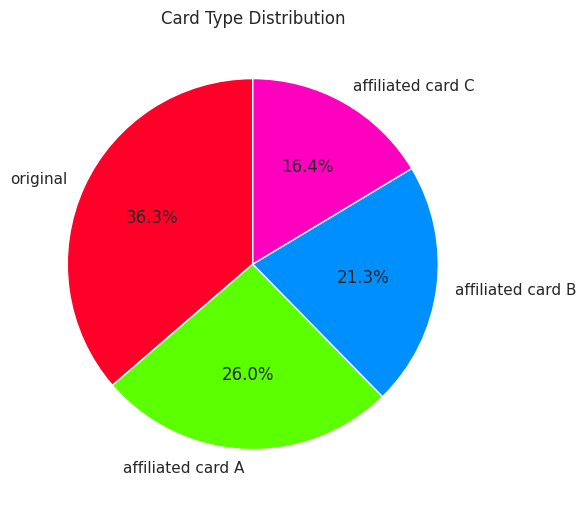

Text(0.5, 1.0, 'Expiration Time in Month at 2019')

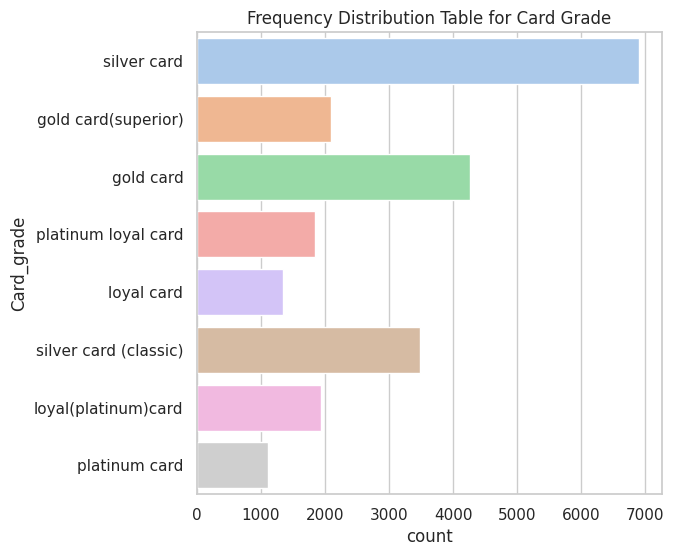

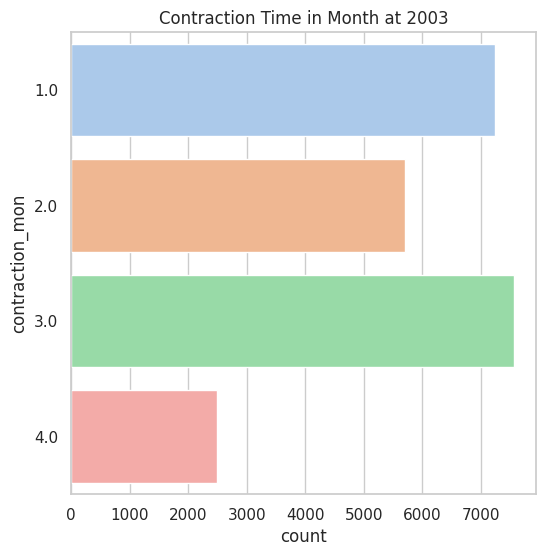

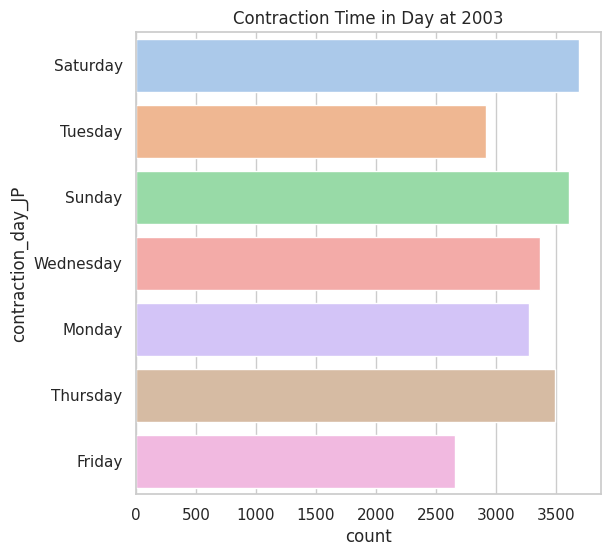

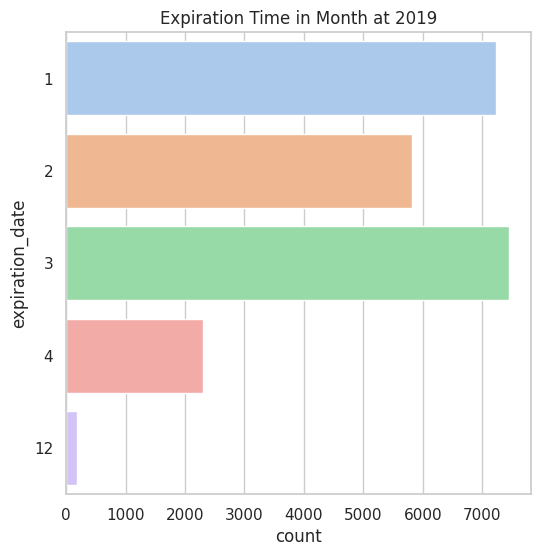

In [ ]:
# Plot 1: Pie Chart Response
plt.figure(figsize=(6,6))
df_clean['Response'].value_counts().plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        colors=['orange', 'orangered'],
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
        )
plt.title('Response Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

# Plot 2: Histogram Age
plt.figure(figsize=(8,5))
sns.histplot(df_clean['Age'], bins=10, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

# Plot 3: Pie Chart Sex
plt.figure(figsize=(6,6))
df_clean['Sex'].value_counts().plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        colors=['orange', 'orangered'],
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
        )
plt.title('Gender Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

# Plot 4: Pie Chart Marital Status
plt.figure(figsize=(6,6))
df_clean['marriage'].value_counts().plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        colors=['orange', 'orangered'],
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
        )
plt.title('Marital Status Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

# Plot 5: Frequency Distribution Table Job
plt.figure(figsize=(6,6))
df_clean['On_the_job'].value_counts().plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        colors=['orange', 'orangered'],
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
        )
plt.title('Working Status Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

df_clean['Job'] = df_clean['Job'].replace(['general payer1', 'general payer2', 'general payer3'], 'general payer')
plt.figure(figsize=(6, 6))
sns.countplot(y=df_clean['Job'], palette="pastel", order=df_clean['Job'].value_counts().index)
plt.title("Frequency Distribution Table for Job")
plt.xlabel("Numbers")
plt.tight_layout()
plt.show()

# Plot 6: Frequency Distribution Table Card Type and Grade
plt.figure(figsize=(6,6))
df_clean['Card_type'].value_counts().plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        colormap='gist_rainbow',
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
        )
plt.title('Card Type Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(y=df_clean['Card_grade'], palette="pastel")
plt.title("Frequency Distribution Table for Card Grade")


# Plot 7: Card Contraction and Expiration Time
plt.figure(figsize=(6, 6))
sns.countplot(y=df_clean['contraction_mon'], palette="pastel")
plt.title("Contraction Time in Month at 2003")
plt.figure(figsize=(6, 6))
sns.countplot(y=df_clean['contraction_day_JP'], palette="pastel")
plt.title("Contraction Time in Day at 2003")

exp_date = pd.to_datetime(df_clean['expiration_date'])
exp_mon = exp_date.dt.month
plt.figure(figsize=(6, 6))
sns.countplot(y=exp_mon, palette="pastel")
plt.title("Expiration Time in Month at 2019")

In [ ]:
df_clean['Age'].describe()

,Age
count,22998.000000
mean,34.747021
std,10.672256
min,5.000000
25%,27.000000
50%,34.000000
75%,41.000000
max,78.000000


Text(0.5, 1.0, 'Frequency Distribution Table for Card Grade')

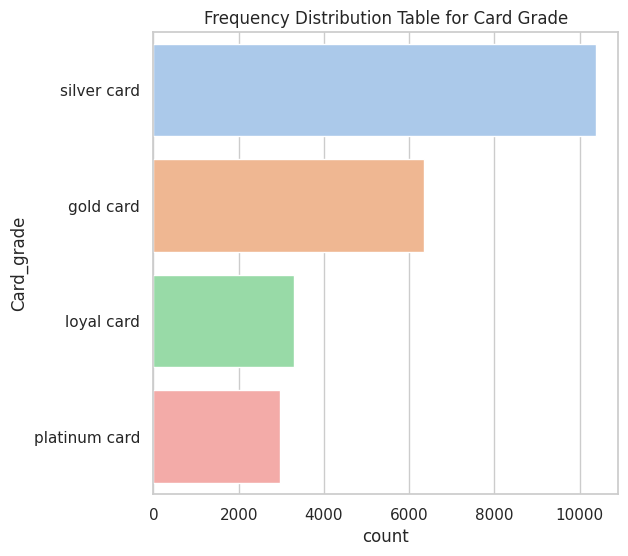

In [ ]:
df_clean['Card_grade'] = df_clean['Card_grade'].replace('gold card(superior)', 'gold card')
df_clean['Card_grade'] = df_clean['Card_grade'].replace('platinum loyal card', 'platinum card')
df_clean['Card_grade'] = df_clean['Card_grade'].replace('loyal(platinum)card', 'loyal card')
df_clean['Card_grade'] = df_clean['Card_grade'].replace('silver card (classic)', 'silver card')

plt.figure(figsize=(6, 6))
sns.countplot(y=df_clean['Card_grade'], palette="pastel", order=df_clean['Card_grade'].value_counts().index)
plt.title("Frequency Distribution Table for Card Grade")

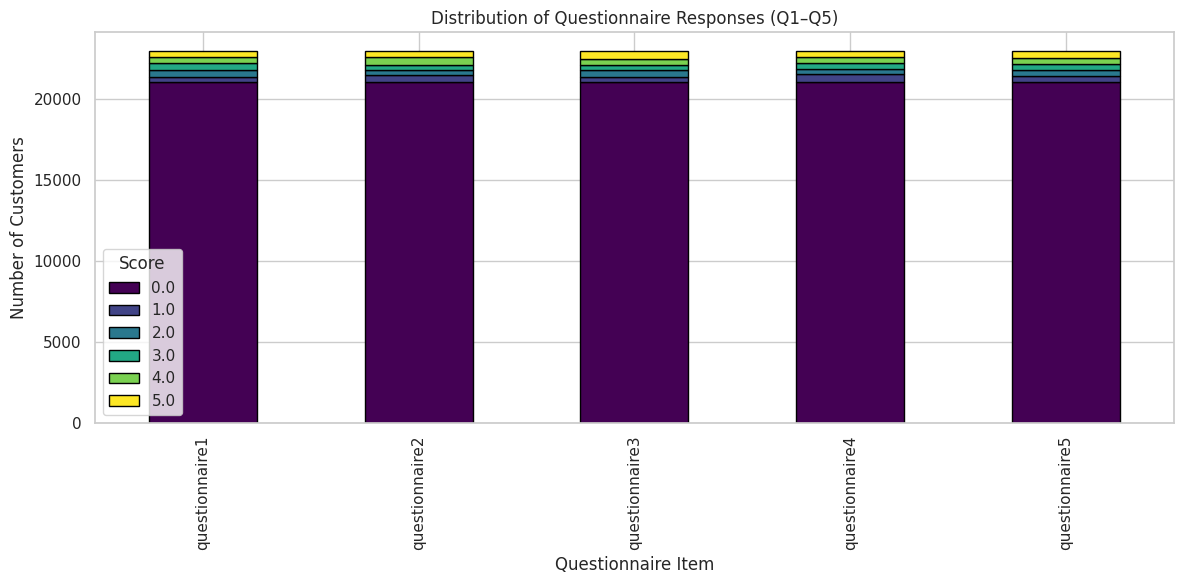

In [ ]:
# Questionnaire
q_cols = [f'questionnaire{i}' for i in range(1,6)]
q_df = df_clean[q_cols].apply(pd.Series.value_counts).fillna(0).astype(int).T
q_df = q_df[[0,1,2,3,4,5]]
q_df.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12,6), edgecolor='black')
plt.title('Distribution of Questionnaire Responses (Q1–Q5)')
plt.xlabel('Questionnaire Item')
plt.ylabel('Number of Customers')
plt.legend(title='Score')
plt.tight_layout()
plt.show()

At this moment questionnaire is not helping

In [ ]:
df_clean[['charge_Monday','charge_Tuesday','charge_Wednesday','charge_Thursday','charge_Friday','charge_Saturday','charge_Sunday']].describe()


,charge_Monday,charge_Tuesday,charge_Wednesday,charge_Thursday,charge_Friday,charge_Saturday,charge_Sunday
count,12085.000000,12643.000000,12941.000000,14596.000000,11749.000000,10943.000000,13695.000000
mean,43872.011833,44298.744523,43309.742137,51251.904974,42209.669759,41994.222334,44674.282147
std,55567.223769,50664.816528,47934.094132,59654.184949,52644.668878,46476.227199,56244.109611
min,3.000000,10.000000,10.000000,2.000000,3.000000,5.000000,1.000000
25%,11277.000000,11455.500000,11119.000000,12728.750000,10618.000000,10493.500000,11747.500000
50%,25762.000000,27601.000000,26637.000000,30221.500000,24340.000000,25271.000000,27576.000000
75%,51968.000000,57430.500000,58984.000000,68057.000000,53516.000000,55454.500000,57118.500000
max,384524.000000,415703.000000,400013.000000,558398.000000,488029.000000,307477.000000,605014.000000


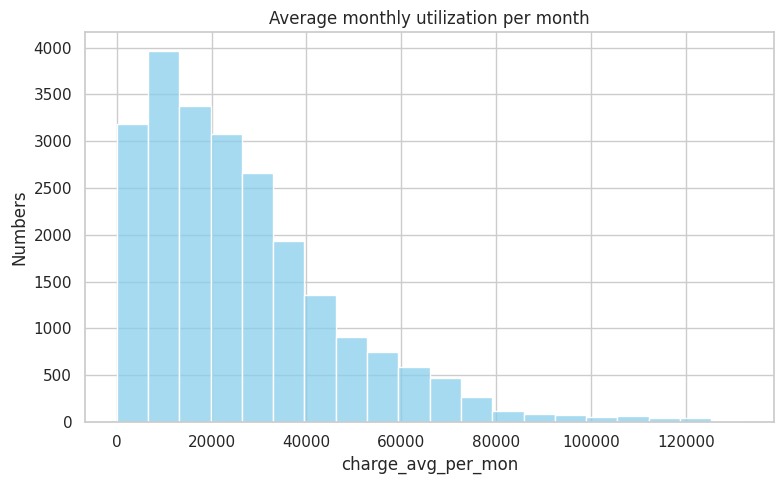

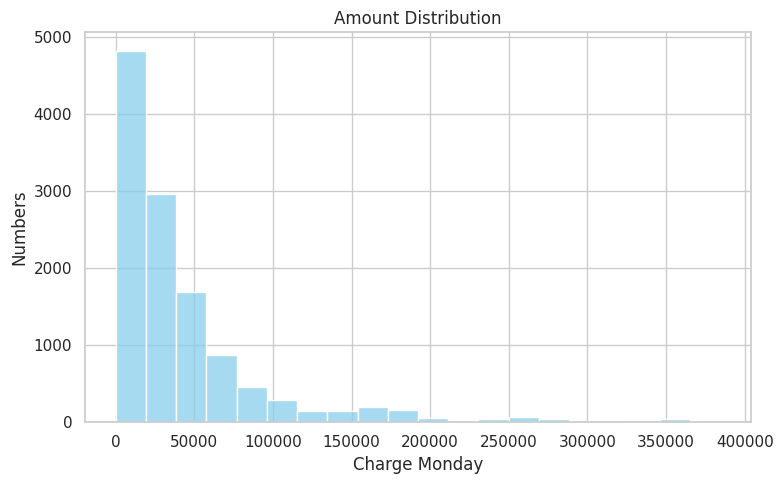

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df_clean['charge_avg_per_mon'], bins=20, color='skyblue')
plt.title('Average monthly utilization per month')
plt.ylabel('Numbers')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df_clean['charge_Monday'], bins=20, color='skyblue')
plt.title('Amount Distribution')
plt.xlabel('Charge Monday')
plt.ylabel('Numbers')
plt.tight_layout()
plt.show()

In [ ]:
avg_mon = [col for col in df_clean.columns if col.endswith('avg_mon')]
last_mon = [col for col in df_clean.columns if col.endswith('avg_lmon')]
df_clean[avg_mon].describe()

,onlineservice_avg_mon,cashing_avg_mon,food_avg_mon,speciality_avg_mon,general_avg_mon,network_avg_mon,onlineshopping_avg_mon,beauty_avg_mon,amusement_avg_mon,travel_avg_mon
count,6187.000000,18414.000000,5458.000000,16338.000000,8776.000000,4742.000000,2032.000000,2288.000000,2204.000000,13446.000000
mean,26628.102796,25789.617954,27223.631916,27116.765822,26556.155766,24146.629903,29146.706693,23868.755245,21209.555808,29326.320170
std,26871.732343,26158.673379,29190.757289,29785.962614,28950.643252,25499.218071,27067.201357,23209.859180,22627.631823,27126.123734
min,15.000000,1.000000,6.000000,5.000000,1.000000,17.000000,6.000000,4.000000,17.000000,0.000000
25%,8941.500000,9063.500000,8069.500000,8179.250000,8199.000000,7614.500000,9359.250000,8135.250000,6206.000000,9149.250000
50%,19051.000000,18757.500000,17413.000000,18028.000000,17218.500000,15709.500000,21091.500000,16573.500000,14287.500000,21187.500000
75%,33918.500000,34040.750000,37982.250000,35364.500000,34191.000000,30533.000000,38098.000000,32156.250000,28202.750000,41640.000000
max,234868.000000,277910.000000,221064.000000,304896.000000,251567.000000,160093.000000,122431.000000,153397.000000,169991.000000,191166.000000


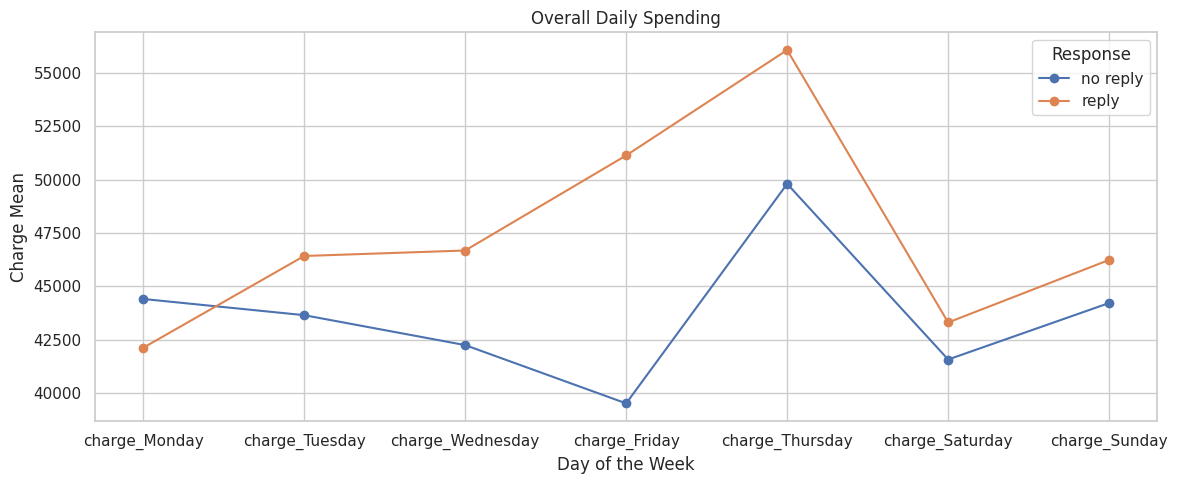

In [ ]:
charges = [col for col in df_clean.columns if col.startswith('charge_')]
selected_charges = [col for col in charges if col not in ['charge_avg_per_mon', 'charge_lmon']]
spending_grp = df_clean.groupby('Response')[selected_charges].mean().T
spending_grp.plot(marker='o', figsize=(12,5))
plt.title('Overall Daily Spending')
plt.xlabel('Day of the Week')
plt.ylabel('Charge Mean')
plt.tight_layout()
plt.show()

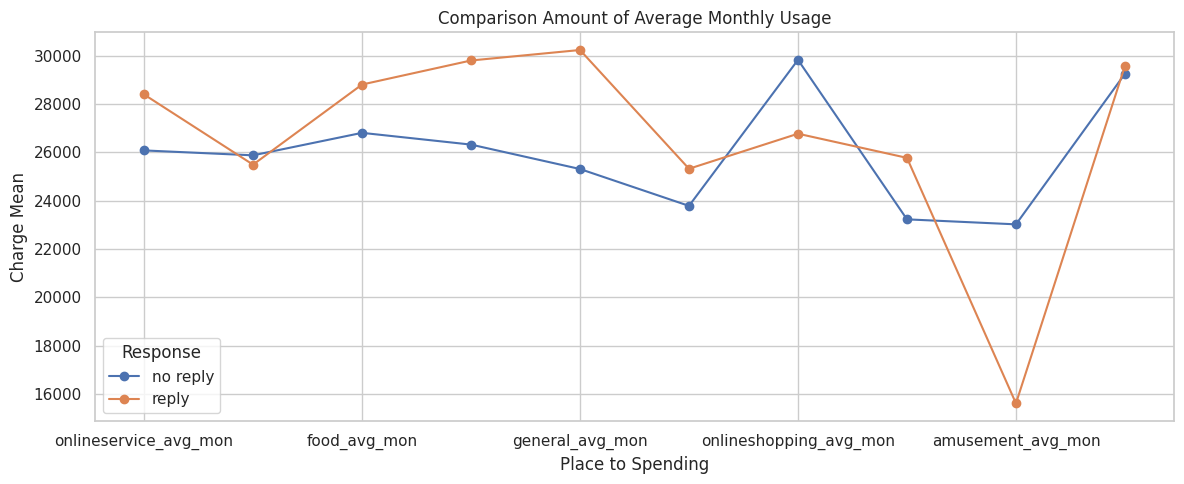

In [ ]:
spending_grp = df_clean.groupby('Response')[avg_mon].mean().T
spending_grp.plot(marker='o', figsize=(12,5))
plt.title('Comparison Amount of Average Monthly Usage')
plt.xlabel('Place to Spending')
plt.ylabel('Charge Mean')
plt.tight_layout()
plt.show()

In [ ]:
# Change data type of contraction and expiration date
df_clean['Card_contraction'] = pd.to_datetime(df_clean['Card_contraction'])
df_clean['expiration_date'] = pd.to_datetime(df_clean['expiration_date'])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22998 entries, 0 to 23042
Data columns (total 69 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   NO                       22998 non-null  int64         
 1   Customer_ID              22998 non-null  int64         
 2   Response                 22998 non-null  object        
 3   Sex                      22998 non-null  object        
 4   Age                      22998 non-null  float64       
 5   Card_type                22998 non-null  object        
 6   Shopping                 22998 non-null  float64       
 7   Cashing                  22998 non-null  float64       
 8   ETC                      22998 non-null  float64       
 9   Card_contraction         22998 non-null  datetime64[ns]
 10  Card_grade               22998 non-null  object        
 11  Job                      17094 non-null  object        
 12  On_the_job               22998 non-nu

In [ ]:
timedelta_days=(df_clean['expiration_date']-df_clean['Card_contraction']).dt.days
df_clean['Card_active']=timedelta_days/365
df_clean['Card_active'].describe()

,Card_active
count,22998.000000
mean,16.019193
std,0.087575
min,15.967123
25%,15.989041
50%,16.013699
75%,16.032877
max,16.964384


In [ ]:
# Remove expiration_date, Card_contraction, contraction_year, contraction_mon, contraction_day, contraction_day_JP, generation
df_clean = df_clean.drop(columns=['NO', 'Customer_ID', 'expiration_date', 'Card_contraction', 'contraction_year', 'contraction_mon', 'contraction_day', 'contraction_day_JP','Card_active'])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22998 entries, 0 to 23042
Data columns (total 61 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Response                 22998 non-null  object 
 1   Sex                      22998 non-null  object 
 2   Age                      22998 non-null  float64
 3   Card_type                22998 non-null  object 
 4   Shopping                 22998 non-null  float64
 5   Cashing                  22998 non-null  float64
 6   ETC                      22998 non-null  float64
 7   Card_grade               22998 non-null  object 
 8   Job                      17094 non-null  object 
 9   On_the_job               22998 non-null  object 
 10  marriage                 21484 non-null  object 
 11  questionnaire1           22998 non-null  float64
 12  questionnaire2           22998 non-null  float64
 13  questionnaire3           22998 non-null  float64
 14  questionnaire4           22

# Bivariate Analysis

## Average month vs last month vs daily charge amount

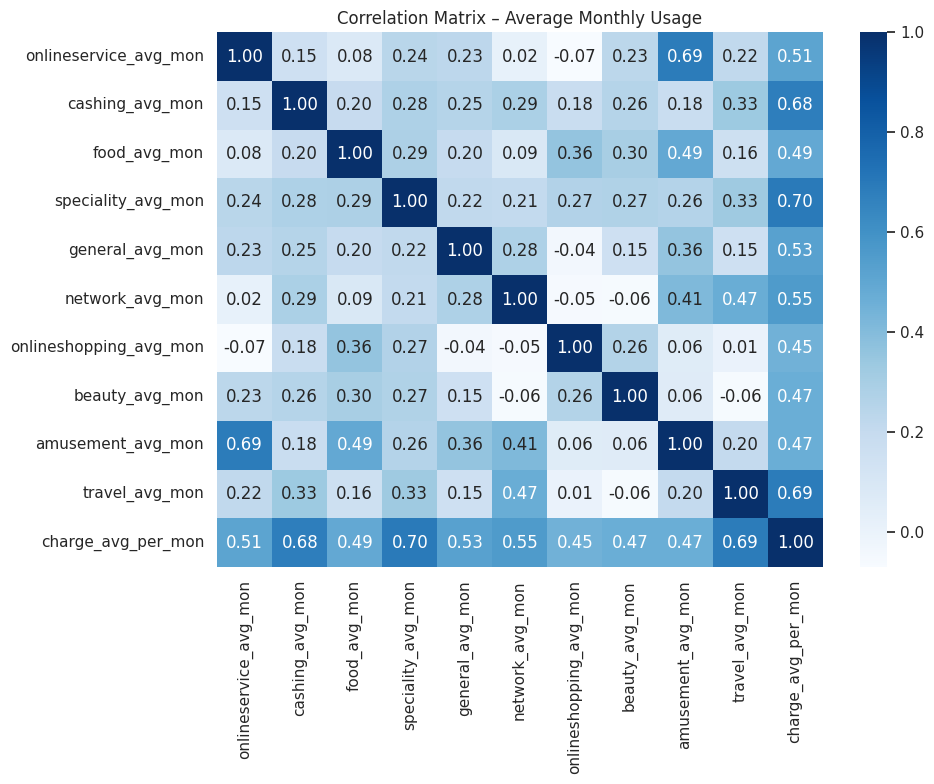

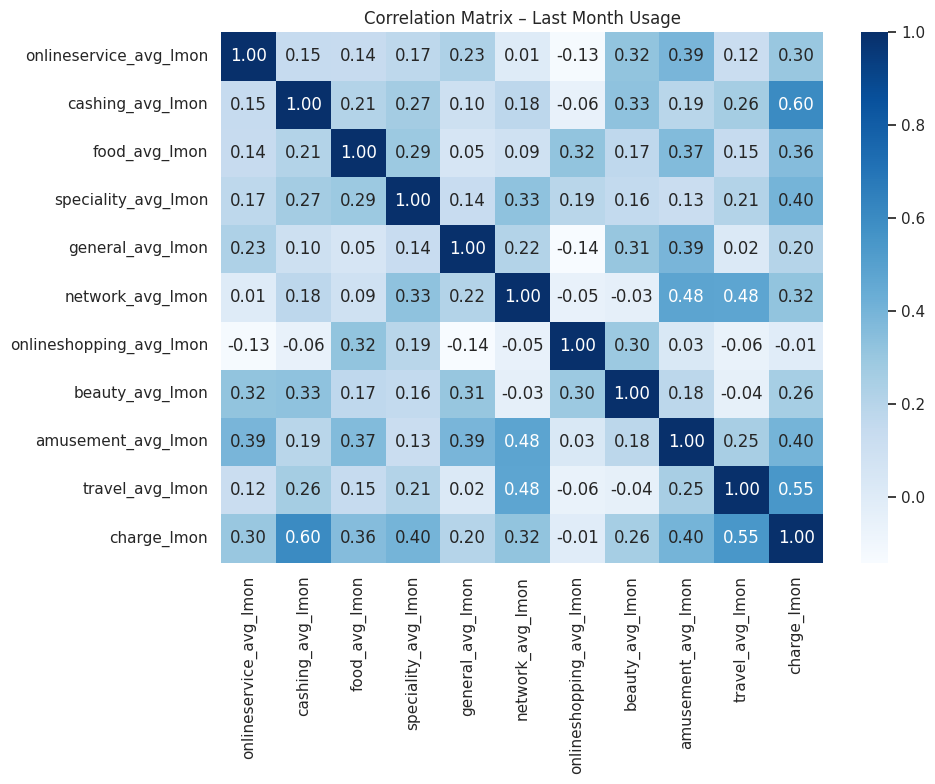

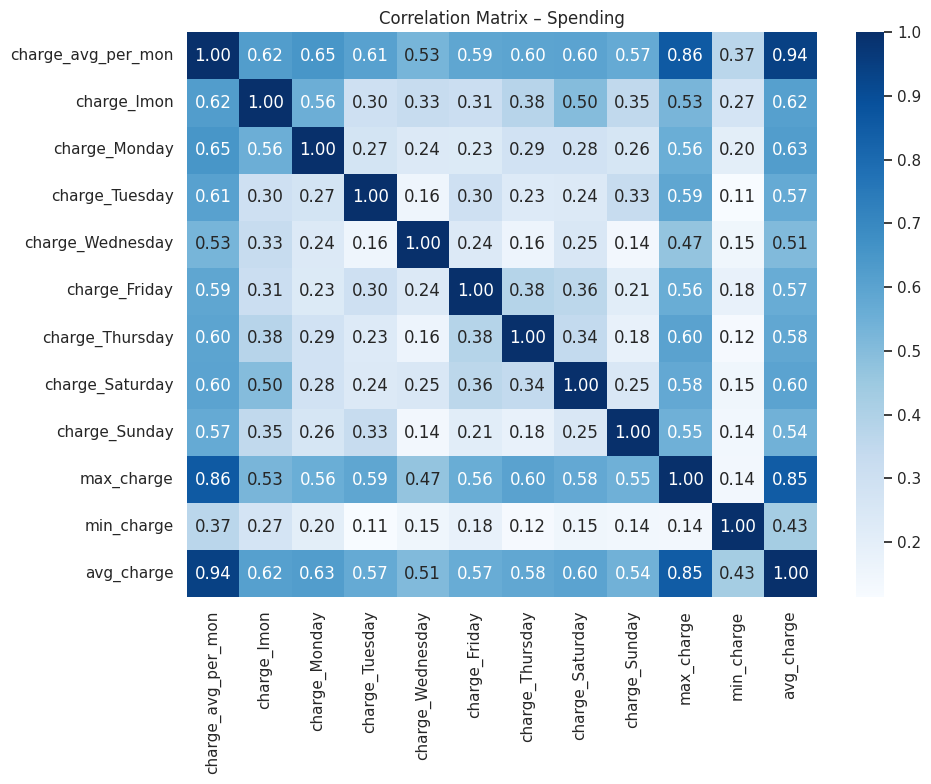

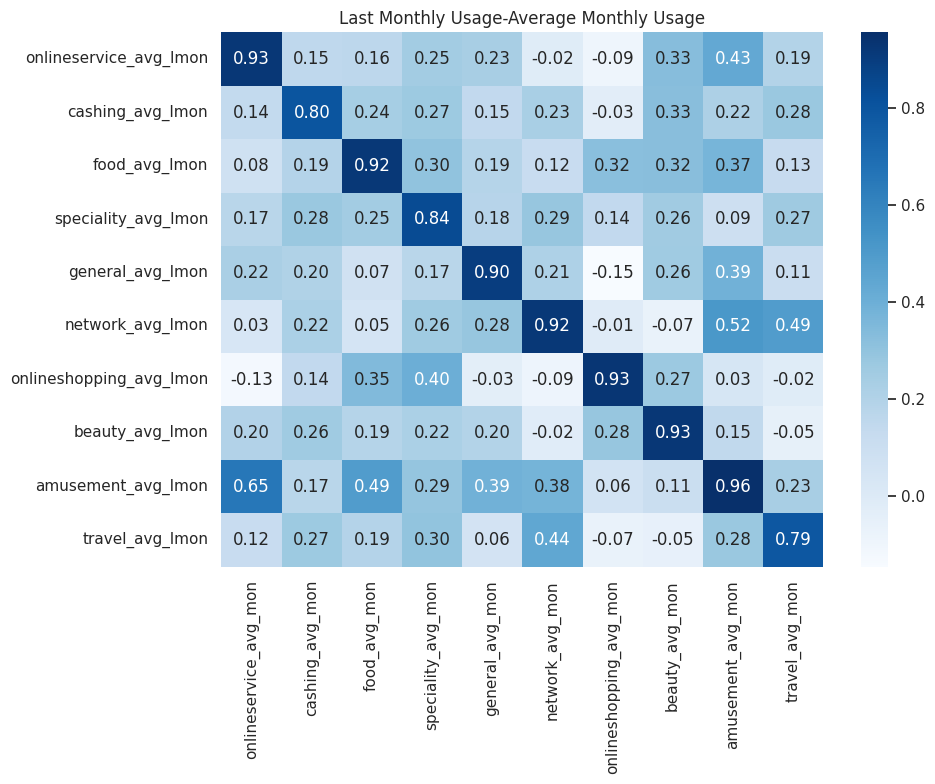

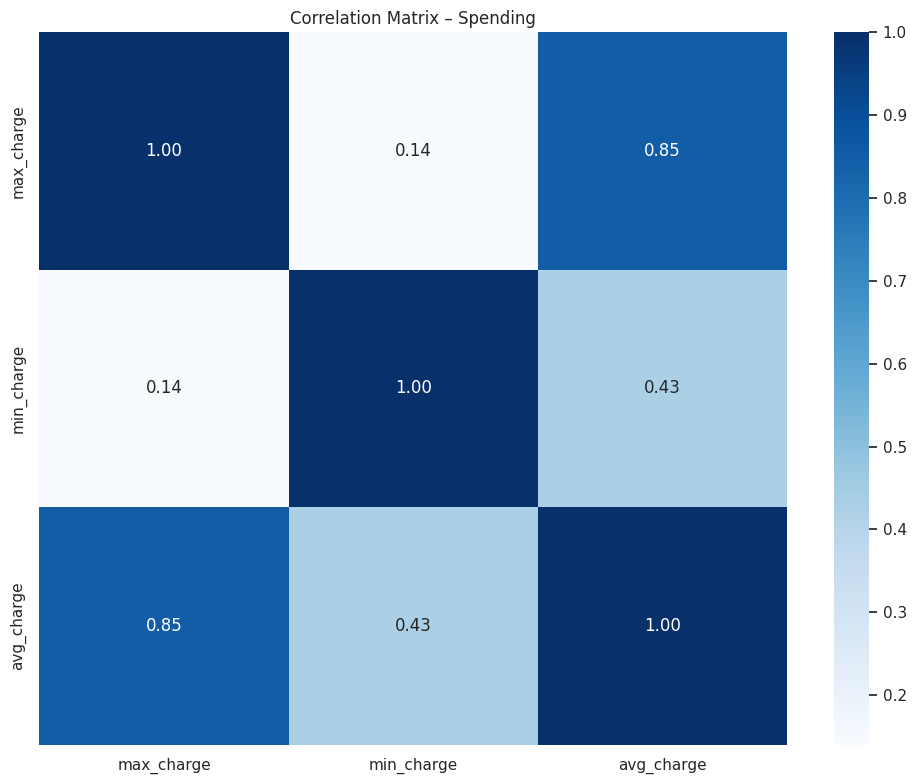

In [ ]:
# State data
avg_mon = [col for col in df_clean.columns if col.endswith('avg_mon')]
last_mon = [col for col in df_clean.columns if col.endswith('avg_lmon')]
charge = [col for col in df_clean.columns if col.startswith('charge_')]

corr1 = df_clean[avg_mon +['charge_avg_per_mon']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr1, annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Matrix – Average Monthly Usage')
plt.tight_layout()
plt.show()

corr2 = df_clean[last_mon+['charge_lmon']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr2, annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Matrix – Last Month Usage')
plt.tight_layout()
plt.show()

corr3 = df_clean[charge+['max_charge','min_charge','avg_charge']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr3, annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Matrix – Spending')
plt.tight_layout()
plt.show()

combined_cols = avg_mon + last_mon
corr4 = df_clean[combined_cols].corr()
sel_col = avg_mon
sel_row = last_mon
corr4_subset = corr4.loc[sel_row, sel_col]
plt.figure(figsize=(10,8))
sns.heatmap(corr4_subset, annot=True, cmap='Blues', fmt='.2f')
plt.title('Last Monthly Usage-Average Monthly Usage')
plt.tight_layout()
plt.show()

corr5 = df_clean[['max_charge','min_charge','avg_charge']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr5, annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Matrix – Spending')
plt.tight_layout()
plt.show()

From this analysis we could eliminate some of the variables.
Variables that we used charge_avg_per_mon & avg_charge

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22998 entries, 0 to 23042
Data columns (total 61 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Response                 22998 non-null  object 
 1   Sex                      22998 non-null  object 
 2   Age                      22998 non-null  float64
 3   Card_type                22998 non-null  object 
 4   Shopping                 22998 non-null  float64
 5   Cashing                  22998 non-null  float64
 6   ETC                      22998 non-null  float64
 7   Card_grade               22998 non-null  object 
 8   Job                      17094 non-null  object 
 9   On_the_job               22998 non-null  object 
 10  marriage                 21484 non-null  object 
 11  questionnaire1           22998 non-null  float64
 12  questionnaire2           22998 non-null  float64
 13  questionnaire3           22998 non-null  float64
 14  questionnaire4           22

In [ ]:
# Remove undesire variables
unwanted_col = avg_mon + last_mon + charge + ['max_charge','min_charge','avg_charge']
unwanted_col.remove('charge_avg_per_mon')
df_clean = df_clean.drop(columns=unwanted_col)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22998 entries, 0 to 23042
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Response             22998 non-null  object 
 1   Sex                  22998 non-null  object 
 2   Age                  22998 non-null  float64
 3   Card_type            22998 non-null  object 
 4   Shopping             22998 non-null  float64
 5   Cashing              22998 non-null  float64
 6   ETC                  22998 non-null  float64
 7   Card_grade           22998 non-null  object 
 8   Job                  17094 non-null  object 
 9   On_the_job           22998 non-null  object 
 10  marriage             21484 non-null  object 
 11  questionnaire1       22998 non-null  float64
 12  questionnaire2       22998 non-null  float64
 13  questionnaire3       22998 non-null  float64
 14  questionnaire4       22998 non-null  float64
 15  questionnaire5       22998 non-null  floa

## Amount of ETC vs Cashing vs Shopping

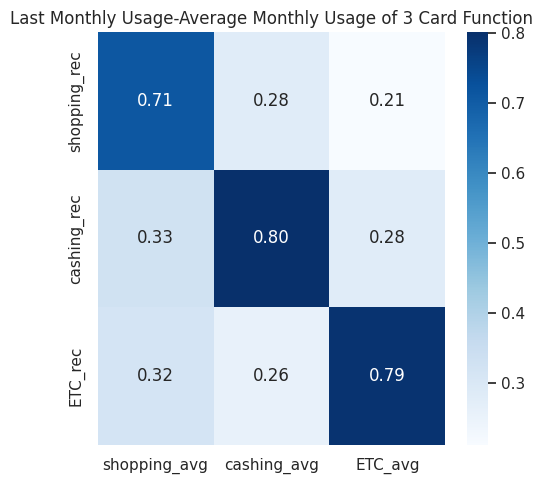

In [ ]:
# State data
avg = [col for col in df_clean.columns if col.endswith('_avg')]
last = [col for col in df_clean.columns if col.endswith('_rec')]

combined_cols = avg + last
corr6 = df_clean[combined_cols].corr()
sel_col = avg
sel_row = last
corr6_subset = corr6.loc[sel_row, sel_col]
plt.figure(figsize=(5,5))
sns.heatmap(corr6_subset, annot=True, cmap='Blues', fmt='.2f')
plt.title('Last Monthly Usage-Average Monthly Usage of 3 Card Function')
plt.tight_layout()
plt.show()

In [ ]:
# Remove undesire variables
unwanted_col = last
df_clean = df_clean.drop(columns=unwanted_col)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22998 entries, 0 to 23042
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Response             22998 non-null  object 
 1   Sex                  22998 non-null  object 
 2   Age                  22998 non-null  float64
 3   Card_type            22998 non-null  object 
 4   Shopping             22998 non-null  float64
 5   Cashing              22998 non-null  float64
 6   ETC                  22998 non-null  float64
 7   Card_grade           22998 non-null  object 
 8   Job                  17094 non-null  object 
 9   On_the_job           22998 non-null  object 
 10  marriage             21484 non-null  object 
 11  questionnaire1       22998 non-null  float64
 12  questionnaire2       22998 non-null  float64
 13  questionnaire3       22998 non-null  float64
 14  questionnaire4       22998 non-null  float64
 15  questionnaire5       22998 non-null  floa

## Questionnaire

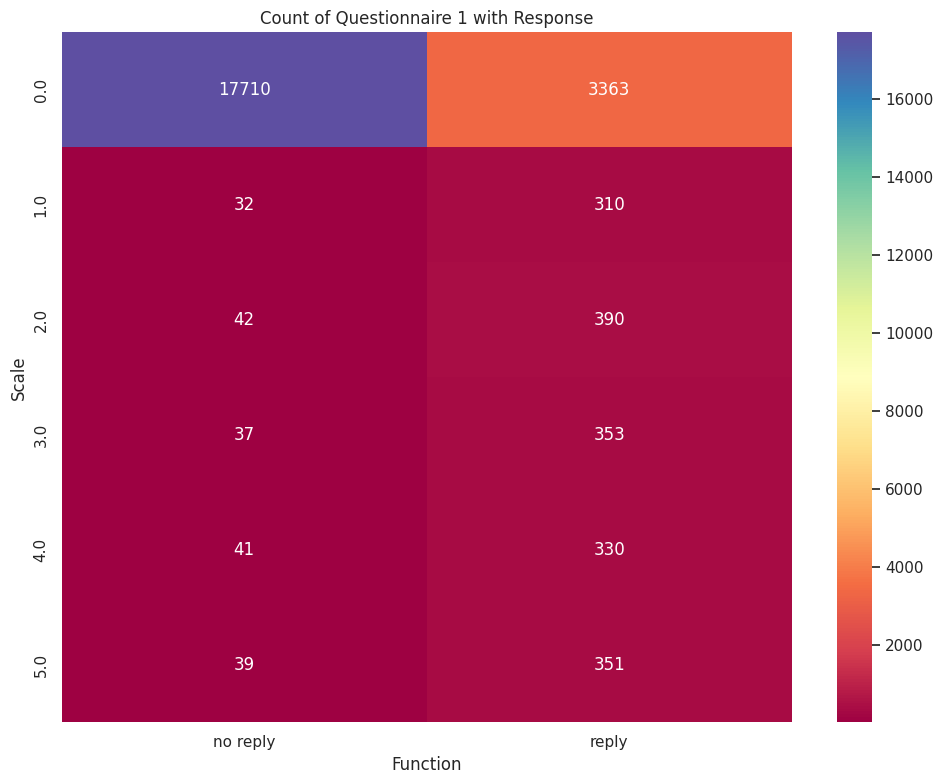

In [ ]:
# Heatmap
heatmap_data = pd.crosstab(index=df_clean['questionnaire1'],
                          columns=df_clean['Response'])

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(heatmap_data, annot=True, cmap='Spectral', fmt='d')
plt.title('Count of Questionnaire 1 with Response')
plt.xlabel('Function')
plt.ylabel('Scale')
plt.tight_layout()
plt.show()

*keknya perlu pake chi test*

for now we drop the questionnaire

In [ ]:
# Remove undesire variables
ques = [col for col in df_clean.columns if col.startswith('questionnaire')]
df_clean = df_clean.drop(columns=ques)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22998 entries, 0 to 23042
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Response             22998 non-null  object 
 1   Sex                  22998 non-null  object 
 2   Age                  22998 non-null  float64
 3   Card_type            22998 non-null  object 
 4   Shopping             22998 non-null  float64
 5   Cashing              22998 non-null  float64
 6   ETC                  22998 non-null  float64
 7   Card_grade           22998 non-null  object 
 8   Job                  17094 non-null  object 
 9   On_the_job           22998 non-null  object 
 10  marriage             21484 non-null  object 
 11  shopping_avg         21186 non-null  float64
 12  cashing_avg          18431 non-null  float64
 13  ETC_avg              12269 non-null  float64
 14  No_records           22998 non-null  float64
 15  max_used_date        22998 non-null  obje

In [ ]:
df_clean = df_clean.drop(columns=['max_used_date', 'min_used_date'])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22998 entries, 0 to 23042
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Response             22998 non-null  object 
 1   Sex                  22998 non-null  object 
 2   Age                  22998 non-null  float64
 3   Card_type            22998 non-null  object 
 4   Shopping             22998 non-null  float64
 5   Cashing              22998 non-null  float64
 6   ETC                  22998 non-null  float64
 7   Card_grade           22998 non-null  object 
 8   Job                  17094 non-null  object 
 9   On_the_job           22998 non-null  object 
 10  marriage             21484 non-null  object 
 11  shopping_avg         21186 non-null  float64
 12  cashing_avg          18431 non-null  float64
 13  ETC_avg              12269 non-null  float64
 14  No_records           22998 non-null  float64
 15  No_function          22998 non-null  floa

data yg miss
1. ETC_avg
2. Job
3. cashing_avg
4. shopping_avg and married (dikit)

masih sus
1. no_record
2. no_function
3. no_member store used
4. no category used
5. generation

## Job and On the Job

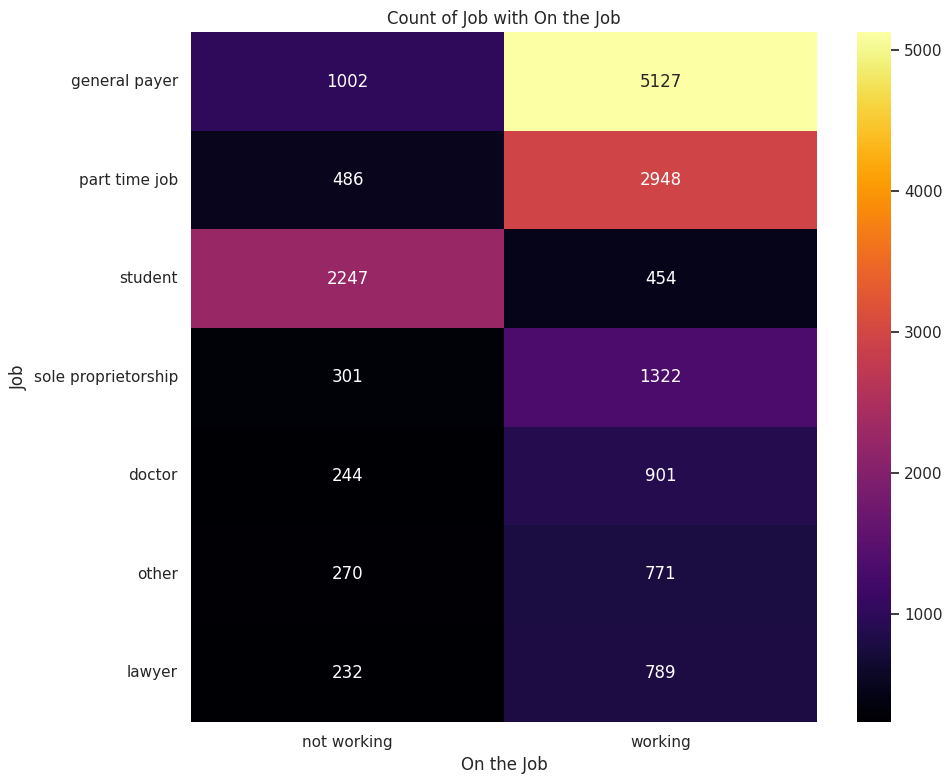

In [ ]:
# Heatmap
heatmap_data = pd.crosstab(index=df_clean['Job'],
                          columns=df_clean['On_the_job'])

# Sort the heatmap_data by the sum of each row to order the y-axis
heatmap_data = heatmap_data.loc[heatmap_data.sum(axis=1).sort_values(ascending=False).index]

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(heatmap_data, annot=True, cmap='inferno', fmt='d')
plt.title('Count of Job with On the Job')
plt.xlabel('On the Job')
plt.ylabel('Job')
plt.tight_layout()
plt.show()

In [ ]:
df_clean.groupby('On_the_job')['Job'].value_counts()

On_the_job   Job                
not working  student                2247
             general payer          1002
             part time job           486
             sole proprietorship     301
             other                   270
             doctor                  244
             lawyer                  232
working      general payer          5127
             part time job          2948
             sole proprietorship    1322
             doctor                  901
             lawyer                  789
             other                   771
             student                 454
Name: count, dtype: int64

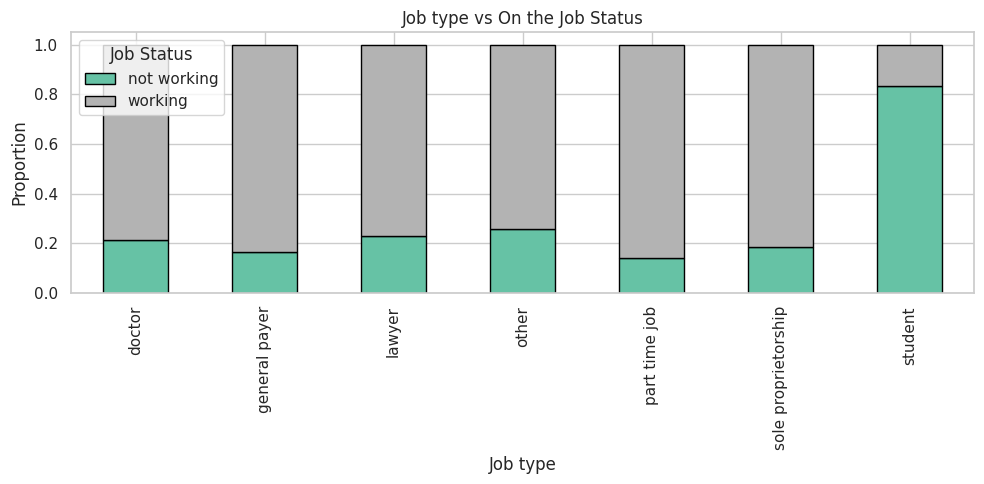

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

crosstab = pd.crosstab(df_clean['Job'], df_clean['On_the_job'])
crosstab_norm = crosstab.div(crosstab.sum(axis=1), axis=0)
crosstab_norm.plot(kind='bar', stacked=True, ax=axes, colormap='Set2', edgecolor='black')

axes.set_title('Job type vs On the Job Status')
axes.set_xlabel('Job type')
axes.set_ylabel('Proportion')
axes.legend(title='Job Status')

plt.tight_layout()
plt.show()


In [ ]:
tes_df = df_clean[['On_the_job','Job']]
tes_df[tes_df['Job']=='other'].head(100)

,On_the_job,Job
15,working,other
81,working,other
142,working,other
146,working,other
158,working,other
...,...,...
2763,working,other
2770,not working,other
2789,working,other
2893,working,other


In [ ]:
# 'Shopping', 'Cashing', 'ETC' is the column you want to convert
df_clean['Shopping'] = df_clean['Shopping'].astype(bool)
df_clean['Cashing'] = df_clean['Cashing'].astype(bool)
df_clean['ETC'] = df_clean['ETC'].astype(bool)


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22998 entries, 0 to 23042
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Response             22998 non-null  object 
 1   Sex                  22998 non-null  object 
 2   Age                  22998 non-null  float64
 3   Card_type            22998 non-null  object 
 4   Shopping             22998 non-null  bool   
 5   Cashing              22998 non-null  bool   
 6   ETC                  22998 non-null  bool   
 7   Card_grade           22998 non-null  object 
 8   Job                  17094 non-null  object 
 9   On_the_job           22998 non-null  object 
 10  marriage             21484 non-null  object 
 11  shopping_avg         21186 non-null  float64
 12  cashing_avg          18431 non-null  float64
 13  ETC_avg              12269 non-null  float64
 14  No_records           22998 non-null  float64
 15  No_function          22998 non-null  floa

----------------

## Card Analysis Characteristics

In [ ]:
df_card = df_clean[['Response','Card_type','Card_grade','Shopping','Cashing','ETC','shopping_avg','cashing_avg','ETC_avg']]

In [ ]:
df_card.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22998 entries, 0 to 23042
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Response      22998 non-null  object 
 1   Card_type     22998 non-null  object 
 2   Card_grade    22998 non-null  object 
 3   Shopping      22998 non-null  bool   
 4   Cashing       22998 non-null  bool   
 5   ETC           22998 non-null  bool   
 6   shopping_avg  21186 non-null  float64
 7   cashing_avg   18431 non-null  float64
 8   ETC_avg       12269 non-null  float64
dtypes: bool(3), float64(3), object(3)
memory usage: 1.3+ MB


In [ ]:
df_card[(df_card['Cashing']==True) & (df_card['Shopping']==False) & (df_card['ETC']==False)].head(20)

,Response,Card_type,Card_grade,Shopping,Cashing,ETC,shopping_avg,cashing_avg,ETC_avg
40,no reply,affiliated card C,gold card,False,True,False,16482.5,12980.0,33030.0
42,no reply,affiliated card C,silver card,False,True,False,3150.0,15790.0,13610.0
52,reply,original,platinum card,False,True,False,34860.0,34040.0,34440.0
53,no reply,affiliated card B,silver card,False,True,False,6950.0,10348.0,NaN
67,no reply,original,loyal card,False,True,False,26943.3,31631.7,NaN
84,no reply,original,gold card,False,True,False,16537.5,6725.0,NaN
90,reply,original,platinum card,False,True,False,4430.0,21370.0,NaN
94,no reply,affiliated card C,platinum card,False,True,False,NaN,5045.0,25160.0
133,no reply,affiliated card A,gold card,False,True,False,NaN,4660.0,NaN
157,reply,original,platinum card,False,True,False,7780.0,20890.0,NaN


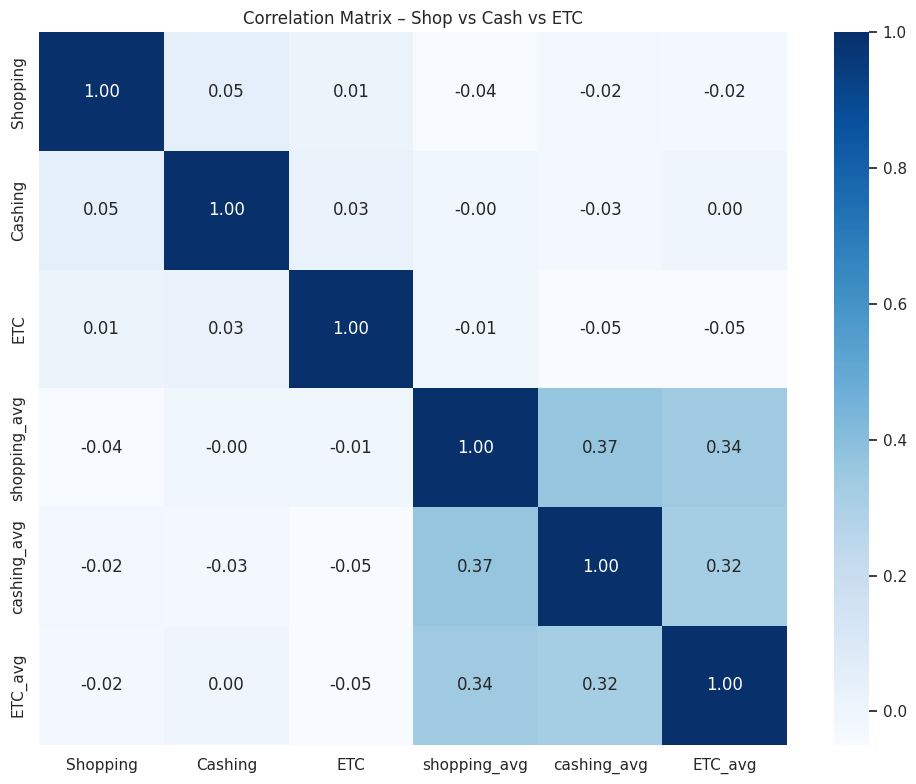

In [ ]:
corr6 = df_card[['Shopping','Cashing','ETC','shopping_avg','cashing_avg','ETC_avg']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr6, annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Matrix – Shop vs Cash vs ETC')
plt.tight_layout()
plt.show()

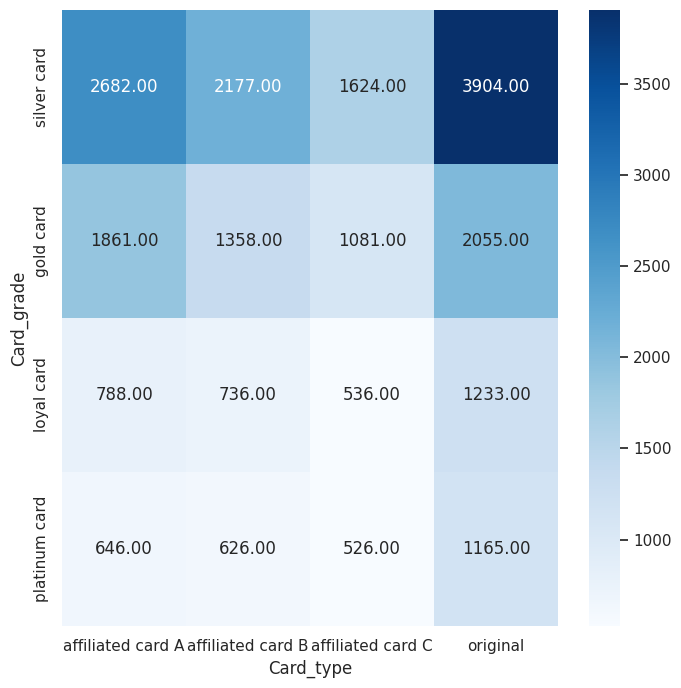

In [ ]:
# @title Card_type vs Card_grade

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Card_grade'].value_counts()
    for x_label, grp in df_card.groupby('Card_type')
})
sns.heatmap(df_2dhist, cmap='Blues', annot=True, fmt='.2f')
plt.xlabel('Card_type')
_ = plt.ylabel('Card_grade')

In [ ]:
df_card.groupby('Card_type')['Card_grade'].value_counts()

Card_type          Card_grade   
affiliated card A  silver card      2682
                   gold card        1861
                   loyal card        788
                   platinum card     646
affiliated card B  silver card      2177
                   gold card        1358
                   loyal card        736
                   platinum card     626
affiliated card C  silver card      1624
                   gold card        1081
                   loyal card        536
                   platinum card     526
original           silver card      3904
                   gold card        2055
                   loyal card       1233
                   platinum card    1165
Name: count, dtype: int64

In [ ]:
# Create a cross-tabulation to count combinations
#heatmap_data = pd.crosstab(index=[df_card['Card_type'], df_card['Card_grade']],
                         # columns=df_card['Function'])

# Plot the heatmap
#plt.figure(figsize=(10, 8))  # Adjust figure size as needed
#sns.heatmap(heatmap_data, annot=True, cmap='Spectral', fmt='d')
#plt.title('Count of Card Grade, Card Type, and Function Combinations')
#plt.xlabel('Function')
#plt.ylabel('Card Grade, Card Type')
#plt.tight_layout()
#plt.show()


In [ ]:
# Create a contingency table
#contingency_table = pd.crosstab(df_card['Card_grade'], df_card['Function'])

# Perform the Chi-squared test
#chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Print the results
#print(f"Chi-squared statistic: {chi2_stat:.3f}")
#print(f"P-value: {p_val:.3f}")
#print(f"Degrees of freedom: {dof:.3f}")

# Print expected frequencies (modified)
#print("Expected frequencies:")
#for row in expected:
    #print([f"{val:.3f}" for val in row]) # Format each element of the row

## Frequency Numbers

In [ ]:
num_df = df_clean[['No_records','No_function','No_member_store_use','No_category_use','generation']]
num_df.head()

,No_records,No_function,No_member_store_use,No_category_use,generation
0,5.0,3.0,4.0,4.0,30s
1,13.0,3.0,7.0,6.0,30s
2,5.0,2.0,4.0,4.0,40s
3,1.0,1.0,1.0,1.0,40s
4,3.0,2.0,2.0,2.0,30s


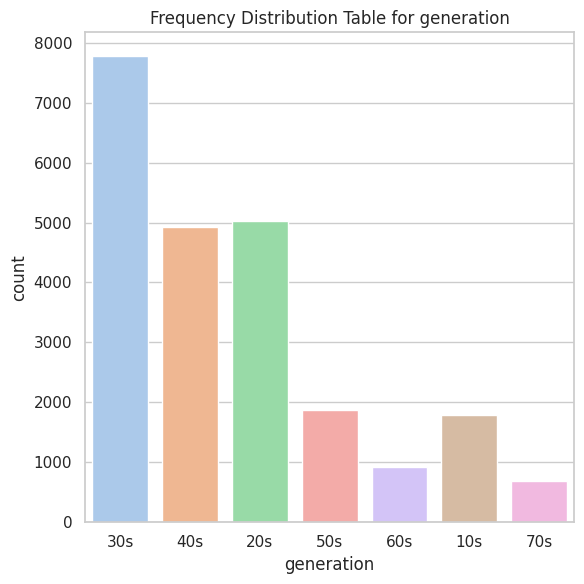

In [ ]:
plt.figure(figsize=(6, 6))
sns.countplot(x=num_df['generation'], palette="pastel")
plt.title("Frequency Distribution Table for generation")
plt.xlabel("generation")
plt.tight_layout()
plt.show()

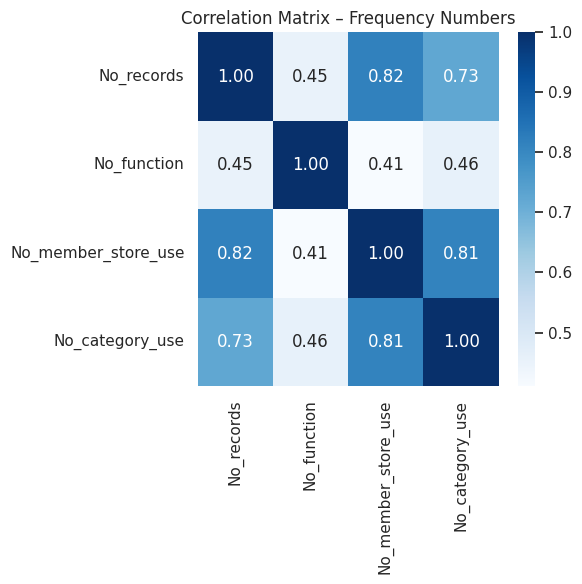

In [ ]:
cor_df = num_df.drop(columns=['generation'])
corr7 = cor_df.corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr7, annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Matrix – Frequency Numbers')
plt.tight_layout()

In [ ]:
# Drop
df_clean = df_clean.drop(columns=['No_records','No_function','No_member_store_use','No_category_use','generation'])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22998 entries, 0 to 23042
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Response            22998 non-null  object 
 1   Sex                 22998 non-null  object 
 2   Age                 22998 non-null  float64
 3   Card_type           22998 non-null  object 
 4   Shopping            22998 non-null  bool   
 5   Cashing             22998 non-null  bool   
 6   ETC                 22998 non-null  bool   
 7   Card_grade          22998 non-null  object 
 8   Job                 17094 non-null  object 
 9   On_the_job          22998 non-null  object 
 10  marriage            21484 non-null  object 
 11  shopping_avg        21186 non-null  float64
 12  cashing_avg         18431 non-null  float64
 13  ETC_avg             12269 non-null  float64
 14  charge_avg_per_mon  22998 non-null  float64
dtypes: bool(3), float64(5), object(7)
memory usage: 2.3+ MB


## Other

In [ ]:
# === 3-3: T-Test & Chi-Square ===
# T-Test
#reply = df_clean[df_clean['Response'] == 'reply']
#noreply = df_clean[df_clean['Response'] == 'no reply']
#for col in charges:
 #  stat, p = ttest_ind(reply[col].dropna(), noreply[col].dropna(), equal_var=False)
 #  print(f'{col}: p-value = {p:.4f}')

In [ ]:
# Chi-Square for categorical vars
#cat_vars = ['sex', 'job', 'marriage']
#from scipy.stats import chi2_contingency
#for col in cat_vars:
 #   table = pd.crosstab(df_clean[col], df_clean['response'])
 #   _, p, _, _ = chi2_contingency(table)
 #   print(f'{col}: p-value = {p:.4f}')

# Multivariate Analysis

Several analysis that we conduct
1. Analysis type : Understanding Card Capabillity (Summarize)

  Method : Kmodes

2. Analysis type :


## Understanding Card

In [ ]:
!pip install kmodes

In [ ]:
from matplotlib.pyplot import xticks
import warnings
warnings.filterwarnings('ignore')


In [ ]:
card_df = df_card.copy()
card_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22998 entries, 0 to 23042
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Response      22998 non-null  object 
 1   Card_type     22998 non-null  object 
 2   Card_grade    22998 non-null  object 
 3   Shopping      22998 non-null  bool   
 4   Cashing       22998 non-null  bool   
 5   ETC           22998 non-null  bool   
 6   shopping_avg  21186 non-null  float64
 7   cashing_avg   18431 non-null  float64
 8   ETC_avg       12269 non-null  float64
dtypes: bool(3), float64(3), object(3)
memory usage: 1.3+ MB


In [ ]:
card_df['shop_bin'] = pd.cut(card_df['shopping_avg'], bins=3, labels=['low', 'medium', 'high'])
card_df['cash_bin'] = pd.cut(card_df['cashing_avg'], bins=3, labels=['low', 'medium', 'high'])
card_df['etc_bin'] = pd.cut(card_df['ETC_avg'], bins=3, labels=['low', 'medium', 'high'])
card_df.head()

,Response,Card_type,Card_grade,Shopping,Cashing,ETC,shopping_avg,cashing_avg,ETC_avg,shop_bin,cash_bin,etc_bin
0,no reply,original,silver card,True,False,False,44610.0,23720.0,6620.0,low,low,low
1,reply,affiliated card A,gold card,True,True,False,27272.0,23174.0,22185.0,low,low,low
2,no reply,affiliated card A,silver card,True,True,True,12510.0,11015.0,NaN,low,low,NaN
3,no reply,original,silver card,True,True,True,3860.0,NaN,NaN,low,NaN,NaN
4,no reply,affiliated card A,gold card,True,False,False,5270.0,11590.0,NaN,low,low,NaN


In [ ]:
card_df.groupby('shop_bin')['shopping_avg'].agg(['min', 'max'])
card_df.groupby('cash_bin')['cashing_avg'].agg(['min', 'max'])
card_df.groupby('etc_bin')['ETC_avg'].agg(['min', 'max'])

,min,max
etc_bin,,
low,1.0,64275.0
medium,64317.0,128525.0
high,128679.0,192836.0


In [ ]:
card_df = card_df.drop(columns=['shopping_avg', 'cashing_avg', 'ETC_avg'])
card_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22998 entries, 0 to 23042
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Response    22998 non-null  object  
 1   Card_type   22998 non-null  object  
 2   Card_grade  22998 non-null  object  
 3   Shopping    22998 non-null  bool    
 4   Cashing     22998 non-null  bool    
 5   ETC         22998 non-null  bool    
 6   shop_bin    21186 non-null  category
 7   cash_bin    18431 non-null  category
 8   etc_bin     12269 non-null  category
dtypes: bool(3), category(3), object(3)
memory usage: 853.8+ KB


In [ ]:
# data inspection
card_df.shape[0]

# checking missing data
card_df.isnull().sum()

,0
Response,0
Card_type,0
Card_grade,0
Shopping,0
Cashing,0
ETC,0
shop_bin,1812
cash_bin,4567
etc_bin,10729


In [ ]:
# Remove missing values
card_df = card_df.dropna(subset=['shop_bin','cash_bin','etc_bin'])
card_df.isnull().sum()

,0
Response,0
Card_type,0
Card_grade,0
Shopping,0
Cashing,0
ETC,0
shop_bin,0
cash_bin,0
etc_bin,0


In [ ]:
# preparing data
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
#card_df = card_df.apply(le.fit_transform)

# import library kmodes
from kmodes.kmodes import KModes

In [ ]:
# checking transform data to numerical
card_df[card_df['Card_grade']==0].head()

,Response,Card_type,Card_grade,Shopping,Cashing,ETC,shop_bin,cash_bin,etc_bin


In [ ]:
# using K-Mode with 'Cao' initialisation
km_cao = KModes(n_clusters=2, init='Cao', n_init=5, verbose=1)
clusters = km_cao.fit_predict(card_df)

# predicted cluster
clusters

clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = card_df.columns

# showing cluster mode
clusterCentroidsDf

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 20602.0


,Response,Card_type,Card_grade,Shopping,Cashing,ETC,shop_bin,cash_bin,etc_bin
0,no reply,original,silver card,False,False,False,low,low,low
1,reply,affiliated card A,gold card,True,True,True,low,low,low


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 22486.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 20602.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 19863.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 779, cost: 18881.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/10

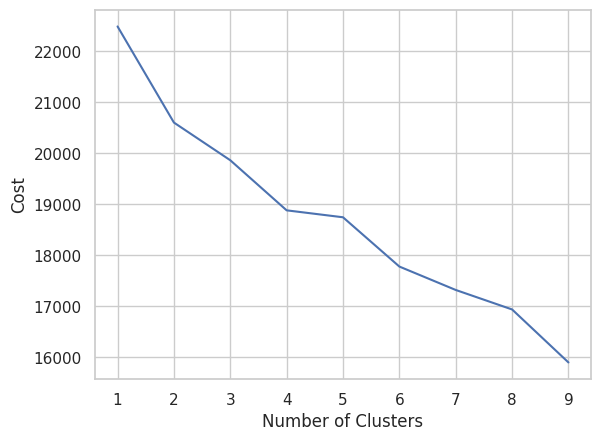

In [ ]:
# memilih nilai K dari perbandingan nilai setiap K denagn pengulangan yang menghasilkan grafik K
cost = []
for num_clusters in list(range(1,10)):
    kmode = KModes(n_clusters=num_clusters, init='Cao', n_init=5, verbose=1)
    kmode.fit_predict(card_df)
    cost.append(kmode.cost_)

y = np.array([i for i in range(1,10)])
plt.plot(y,cost)
plt.xlabel('Number of Clusters')
plt.ylabel('Cost')
plt.show()


In [ ]:
# memilih K ke-4
km_cao = KModes(n_clusters=4, init='Cao', n_init=5, verbose=1)
clusters = km_cao.fit_predict(card_df)
clusters

# Using predicted cluster
clustersDf = pd.DataFrame(clusters)
clustersDf.columns = ['Cluster']
combinedDf = pd.concat([card_df, clustersDf], axis=1).reset_index()
combinedDf = combinedDf.drop(['index'], axis=1)

# Showing
combinedDf.head()

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 779, cost: 18881.0


,Response,Card_type,Card_grade,Shopping,Cashing,ETC,shop_bin,cash_bin,etc_bin,Cluster
0,no reply,original,silver card,True,False,False,low,low,low,0.0
1,reply,affiliated card A,gold card,True,True,False,low,low,low,1.0
2,no reply,original,gold card,True,False,False,low,low,low,0.0
3,reply,affiliated card B,silver card,True,True,True,low,low,low,0.0
4,no reply,affiliated card A,silver card,True,True,False,low,low,low,2.0


In [ ]:
combinedDf[combinedDf['Cluster']==3].head()

,Response,Card_type,Card_grade,Shopping,Cashing,ETC,shop_bin,cash_bin,etc_bin,Cluster
5,no reply,affiliated card A,silver card,True,False,False,low,low,low,3.0
41,no reply,affiliated card A,platinum card,False,True,True,low,low,low,3.0
43,reply,original,platinum card,False,False,False,low,low,low,3.0
57,no reply,original,gold card,True,True,False,medium,low,medium,3.0
76,reply,original,loyal card,True,False,False,medium,low,low,3.0


<class 'pandas.core.frame.DataFrame'>
Index: 6993 entries, 0 to 14510
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Response    2807 non-null   object  
 1   Card_type   2807 non-null   object  
 2   Card_grade  2807 non-null   object  
 3   Shopping    2807 non-null   object  
 4   Cashing     2807 non-null   object  
 5   ETC         2807 non-null   object  
 6   shop_bin    2807 non-null   category
 7   cash_bin    2807 non-null   category
 8   etc_bin     2807 non-null   category
 9   Cluster     6993 non-null   float64 
dtypes: category(3), float64(1), object(6)
memory usage: 457.9+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 804 entries, 1 to 14511
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Response    315 non-null    object  
 1   Card_type   315 non-null    object  
 2   Card_grade  315 non-null    object  
 3   Shopping 

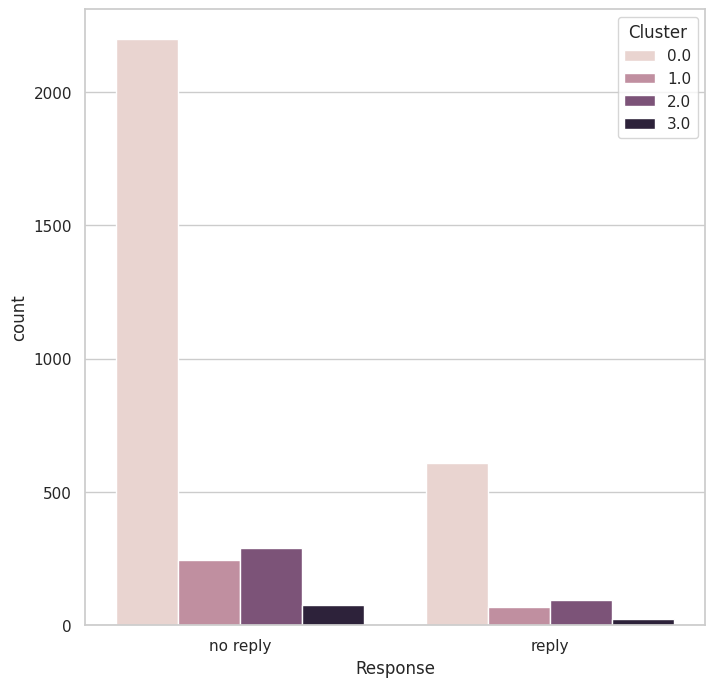

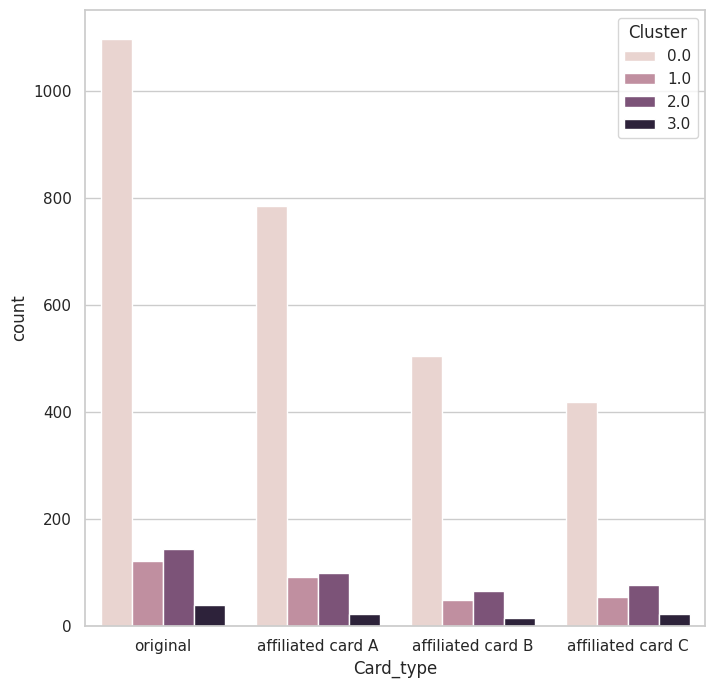

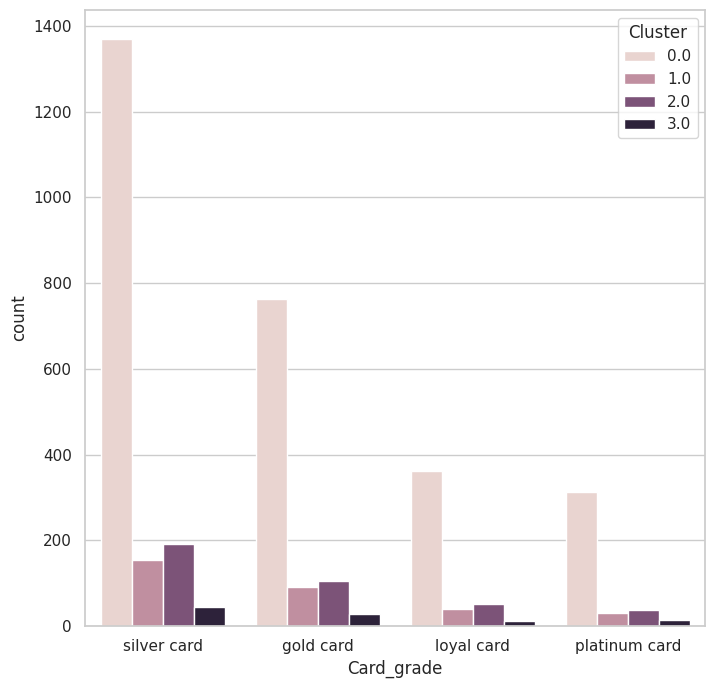

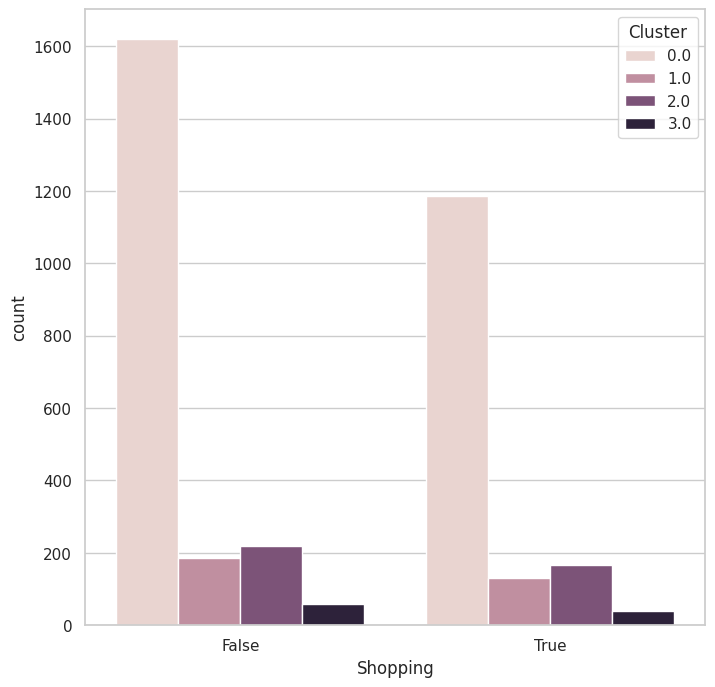

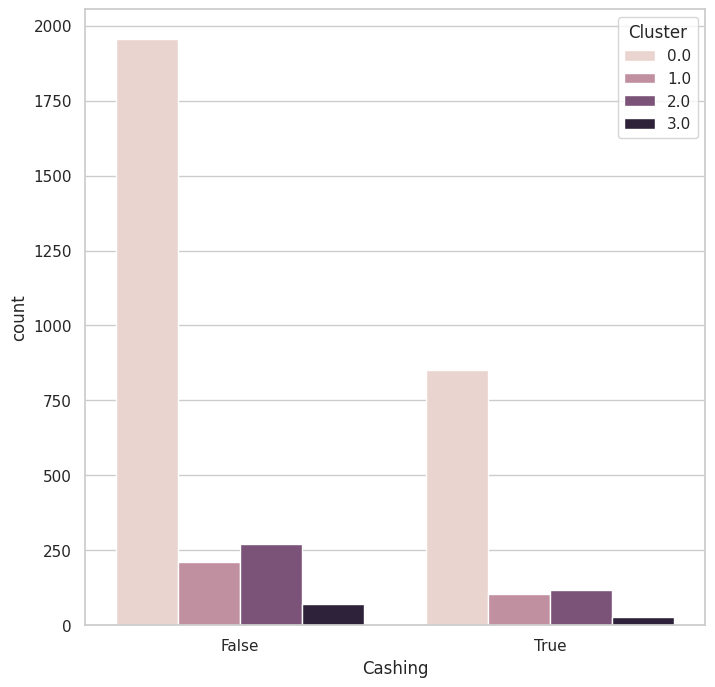

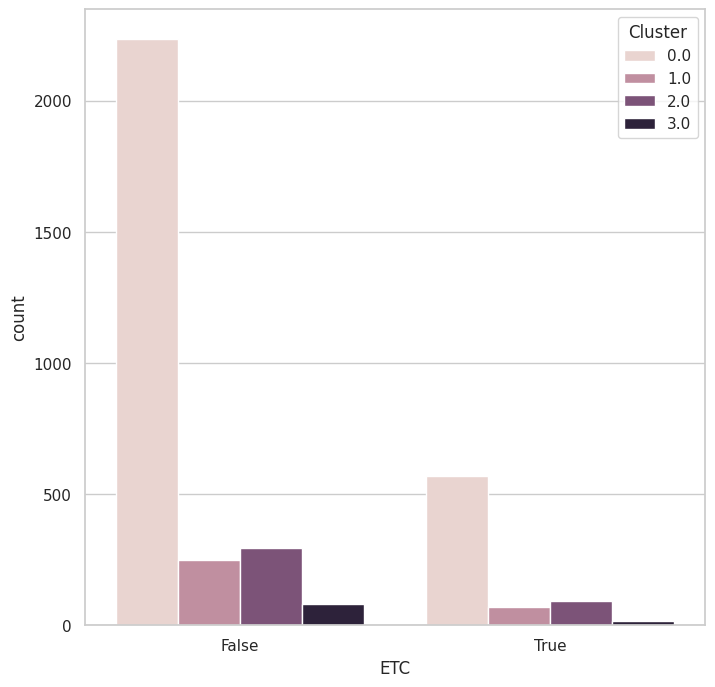

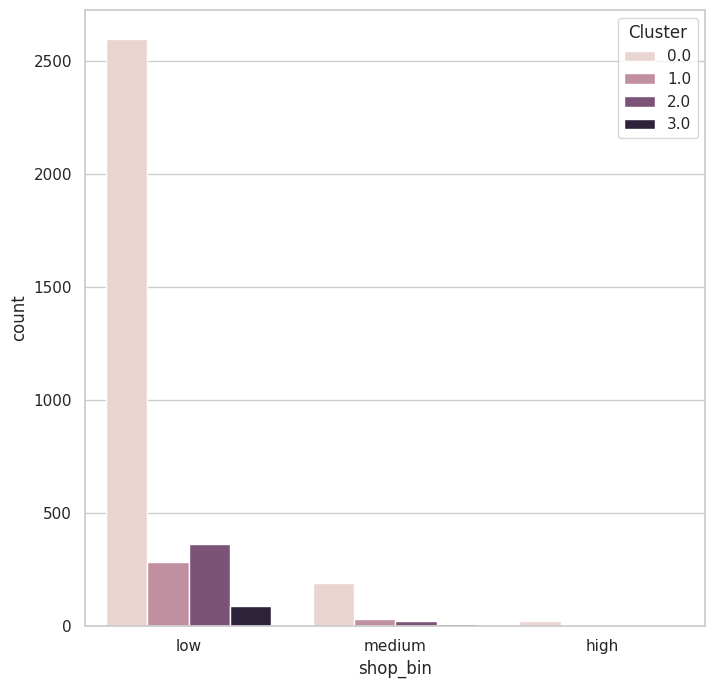

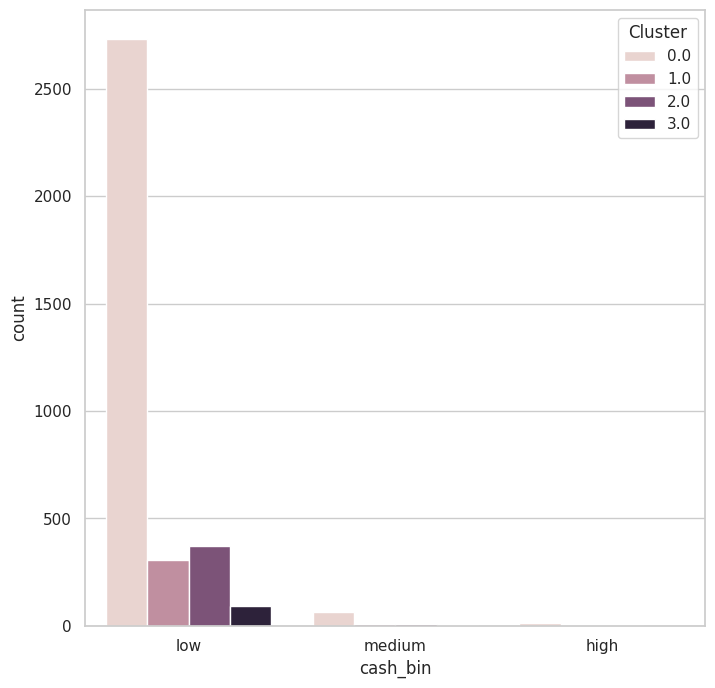

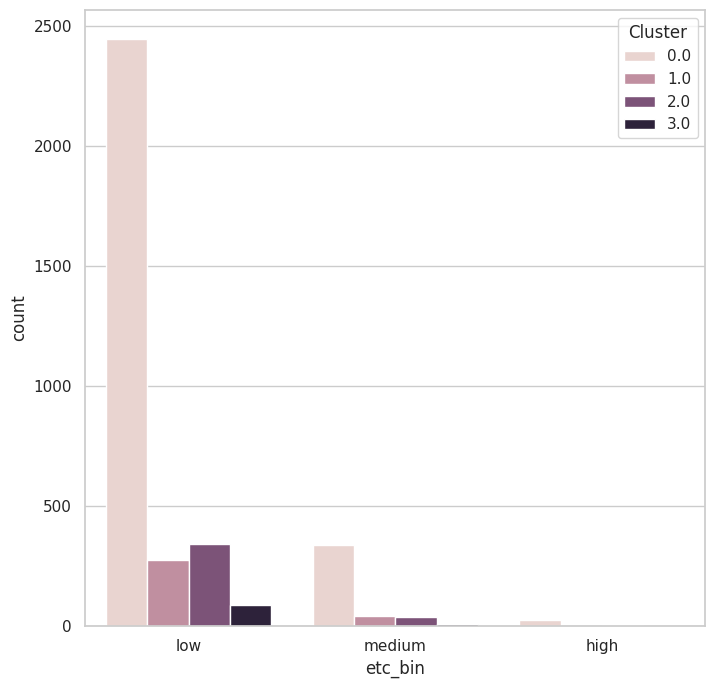

In [ ]:
# Identifikasi cluster
cluster_0 = combinedDf[combinedDf['Cluster']==0]
cluster_1 = combinedDf[combinedDf['Cluster']==1]
cluster_2 = combinedDf[combinedDf['Cluster']==2]
cluster_3 = combinedDf[combinedDf['Cluster']==3]

cluster_0.info()
cluster_1.info()
cluster_2.info()
cluster_3.info()

# Identifikasi response
plt.subplots(figsize=(8, 8))
sns.countplot(x=combinedDf['Response'], hue=combinedDf['Cluster'])
plt.show()

# Identifikasi card type
plt.subplots(figsize=(8, 8))
sns.countplot(x=combinedDf['Card_type'], order=combinedDf['Card_type'].value_counts().index, hue=combinedDf['Cluster'])
plt.show()

# Identifikasi card grade
plt.subplots(figsize=(8, 8))
sns.countplot(x=combinedDf['Card_grade'], order=combinedDf['Card_grade'].value_counts().index, hue=combinedDf['Cluster'])
plt.show()

# Identifikasi fungsi
plt.subplots(figsize=(8, 8))
sns.countplot(x=combinedDf['Shopping'], hue=combinedDf['Cluster'])
plt.show()

plt.subplots(figsize=(8, 8))
sns.countplot(x=combinedDf['Cashing'], hue=combinedDf['Cluster'])
plt.show()

plt.subplots(figsize=(8, 8))
sns.countplot(x=combinedDf['ETC'], hue=combinedDf['Cluster'])
plt.show()

# Identifikasi range
plt.subplots(figsize=(8, 8))
sns.countplot(x=combinedDf['shop_bin'], hue=combinedDf['Cluster'])
plt.show()

plt.subplots(figsize=(8, 8))
sns.countplot(x=combinedDf['cash_bin'], hue=combinedDf['Cluster'])
plt.show()

plt.subplots(figsize=(8, 8))
sns.countplot(x=combinedDf['etc_bin'], hue=combinedDf['Cluster'])
plt.show()

## Decision tree analysis

# Convert categorical column to numerical using label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Sex'] = le.fit_transform(X['Sex'])
X['Job'] = le.fit_transform(X['Job'])
X['Marriage'] = le.fit_transform(X['Marriage'])
X['Card_type'] = le.fit_transform(X['Card_type'])
X['Card_grade'] = le.fit_transform(X['Card_grade'])
X['On_the_job'] = le.fit_transform(X['On_the_job]')

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22998 entries, 0 to 23042
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Response            22998 non-null  object 
 1   Sex                 22998 non-null  object 
 2   Age                 22998 non-null  float64
 3   Card_type           22998 non-null  object 
 4   Shopping            22998 non-null  bool   
 5   Cashing             22998 non-null  bool   
 6   ETC                 22998 non-null  bool   
 7   Card_grade          22998 non-null  object 
 8   Job                 17094 non-null  object 
 9   On_the_job          22998 non-null  object 
 10  marriage            21484 non-null  object 
 11  shopping_avg        21186 non-null  float64
 12  cashing_avg         18431 non-null  float64
 13  ETC_avg             12269 non-null  float64
 14  charge_avg_per_mon  22998 non-null  float64
dtypes: bool(3), float64(5), object(7)
memory usage: 2.3+ MB


In [ ]:
col_drop = ['Shopping', 'Cashing', 'ETC']
df_clean = df_clean.drop(col_drop, axis=1)
df_clean.info()
df_clean.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 22998 entries, 0 to 23042
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Response            22998 non-null  object 
 1   Sex                 22998 non-null  object 
 2   Age                 22998 non-null  float64
 3   Card_type           22998 non-null  object 
 4   Card_grade          22998 non-null  object 
 5   Job                 17094 non-null  object 
 6   On_the_job          22998 non-null  object 
 7   marriage            21484 non-null  object 
 8   shopping_avg        21186 non-null  float64
 9   cashing_avg         18431 non-null  float64
 10  ETC_avg             12269 non-null  float64
 11  charge_avg_per_mon  22998 non-null  float64
dtypes: float64(5), object(7)
memory usage: 2.3+ MB


,0
Response,0
Sex,0
Age,0
Card_type,0
Card_grade,0
Job,5904
On_the_job,0
marriage,1514
shopping_avg,1812
cashing_avg,4567


In [ ]:
df_model = df_clean.dropna()
df_model.isnull().sum()

,0
Response,0
Sex,0
Age,0
Card_type,0
Card_grade,0
Job,0
On_the_job,0
marriage,0
shopping_avg,0
cashing_avg,0


In [ ]:
# Ubah target ke numerik
df_model['Response'] = df_model['Response'].map({'no reply': 0, 'reply': 1})
df_model['marriage'] = df_model['marriage'].map({'unmarried': 0, 'married': 1})
#df_model['sex'] = df_model['sex'].map({'female': 0, 'male': 1})

# Ubah semua kategorik ke numerik (otomatis semua object-type diubah jadi dummy)
df_model = pd.get_dummies(df_model, drop_first=True)

df_model.head()

,Response,Age,marriage,shopping_avg,cashing_avg,ETC_avg,charge_avg_per_mon,Sex_M,Card_type_affiliated card B,Card_type_affiliated card C,...,Card_grade_loyal card,Card_grade_platinum card,Card_grade_silver card,Job_general payer,Job_lawyer,Job_other,Job_part time job,Job_sole proprietorship,Job_student,On_the_job_working
1,1,39.0,0,27272.0,23174.0,22185.0,29660.0,True,False,False,...,False,False,False,True,False,False,False,False,False,True
5,0,38.0,0,60140.0,4070.0,15130.0,34870.0,True,False,False,...,False,False,False,True,False,False,False,False,False,True
13,1,39.0,1,59050.0,5280.0,19306.7,34118.0,True,True,False,...,False,False,True,True,False,False,False,False,False,True
14,0,39.0,0,40100.0,21555.0,18565.0,30085.0,True,False,False,...,False,False,True,True,False,False,False,False,False,True
19,0,60.0,0,48983.3,32910.0,60033.3,51422.0,True,False,False,...,False,False,False,False,True,False,False,False,False,True


In [ ]:
# Select independent variables and dependent variables
y = df_model['Response']
X = df_model.drop(columns=['Response'])

In [ ]:
# Importing train_test_split to create valiadation set
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)

# Distribution in training set
y_train.value_counts(normalize=True)

# Distribution in validation set
y_valid.value_counts(normalize=True)

# Shape of training set
X_train.shape, y_train.shape

# Shape of validation set
X_valid.shape, y_valid.shape

# Importing decision tree tools
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

# Creating decision tree function
df_model = DecisionTreeClassifier(random_state=101)

# Fitting the model
df_model.fit(X_train, y_train)
# Checking the training score
df_model.score(X_train, y_train)

# Checking the validation score
df_model.score(X_valid, y_valid)

# Predictions on validation set
#df_model.predict(X_valid)

#df_model.predict_proba(X_valid)

y_pred = df_model.predict_proba(X_valid)[:,1]

new_y = []
for i in range(len(y_pred)):
  if y_pred[i] >= 0.5:
    new_y.append(1)
  else:
    new_y.append(0)

# Calculate ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_valid, new_y)

# Calculate AUC
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc:.4f}")

AUC: 0.6476


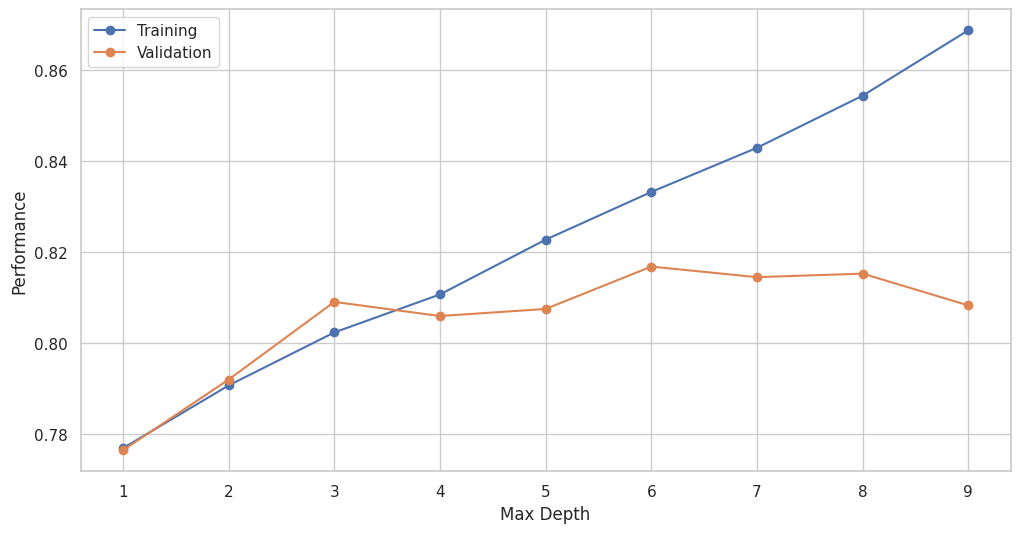

In [ ]:
train_accuracy = []
validation_accuracy = []
for i in range(1, 10):
  df_model = DecisionTreeClassifier(max_depth=i, random_state=101)
  df_model.fit(X_train, y_train)
  train_accuracy.append(df_model.score(X_train, y_train))
  validation_accuracy.append(df_model.score(X_valid, y_valid))

frame = pd.DataFrame({'max_depth': range(1, 10), 'train_acc': train_accuracy, 'valid_acc': validation_accuracy})
frame.head()

plt.figure(figsize=(12, 6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Performance')
plt.legend(['Training', 'Validation'])
plt.show()

In [ ]:
df_model = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=25, random_state=101)
df_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=25, random_state=101)

In [ ]:
df_model.score(X_train, y_train)

0.8106428432705379

In [ ]:
df_model.score(X_valid, y_valid)

0.8059006211180124

In [ ]:
from sklearn import tree
!pip install graphviz

In [ ]:
decision_tree = tree.export_graphviz(df_model, out_file='tree.dot', feature_names=X_train.columns, max_depth=4, filled=True)

In [ ]:
!dot -Tpng tree.dot -o tree.png

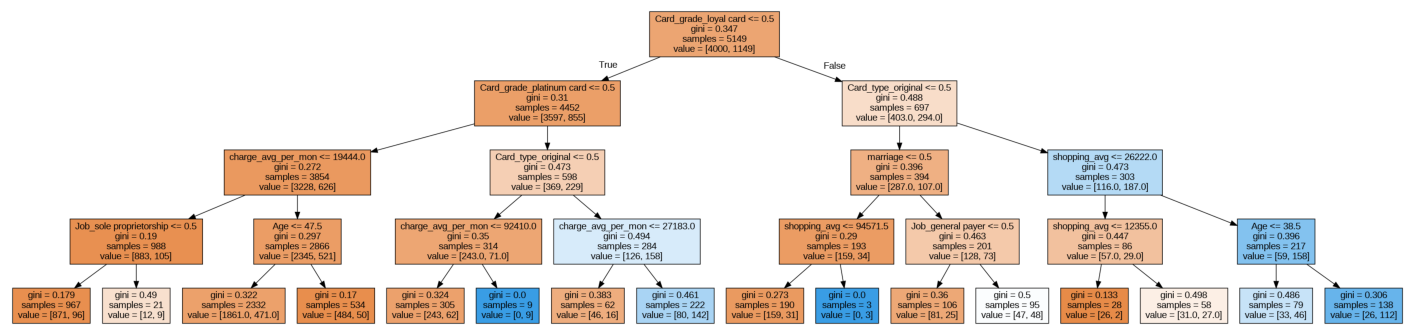

In [ ]:
image = plt.imread('tree.png')
plt.figure(figsize=(18, 10))
plt.imshow(image)
plt.axis('off')
plt.show()